<a href="https://colab.research.google.com/github/chandrap08/ml-code/blob/master/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -U clustimage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 4.4 MB/s 
     |████████████████████████████████| 812 kB 40.1 MB/s 
     |████████████████████████████████| 1.1 MB 36.9 MB/s 
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=748215557b5736f7151cf562ddaf051edd513958c63532a54963bf23dbf64f6f
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=06c86a6bc547c9ca8798f9d783ccfe653f0acdbd00358fe4095e1fd50c51b6b0
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=a28b154f4b0a8a25a85ae0fb9245a6749019fc2dc18a82478c753d95de1a6860
  Stored in directory: /root/.cache/pip/whe

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from clustimage import Clustimage

In [9]:
# init with PCA method
cl = Clustimage(method='pca',
                embedding='tsne',
                grayscale=False,
                dim=(128,128),
                params_pca={'n_components':0.95},
                store_to_disk=True,
                verbose=50)

In [10]:
# Load example data
X = cl.import_example(data='mnist')

# Check whether in is dir, list of files or array-like
X = cl.import_data(X)
Xfeat = cl.extract_feat(X)
# Alternatively, the features are also stored in the results dict
cl.results['feat']

[pca] >Column labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [64] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [29] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [64] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.


array([[ -23.99825562,  361.66766993, -156.23555786, ...,   63.05027292,
         -18.06339631,  -18.81280557],
       [ 129.01046858, -332.19361871,   69.70334056, ...,   34.61146285,
          -6.7427895 ,   37.50464261],
       [ 112.68904729, -158.58007767,   45.77924866, ...,   67.43609072,
          35.40119722,   11.51617561],
       ...,
       [ 173.17792866, -109.2404582 ,   88.45892932, ...,  -56.47260833,
          30.65703324,   55.85573398],
       [ -79.27380796,  198.65635583, -161.04324229, ...,   50.98445967,
          14.98701273,  -15.61371962],
       [  -6.24252968,  101.23191553,  172.11573305, ...,  -48.81749756,
          22.14032992,   38.97929772]])

In [12]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2340292 sha256=8cd80245f17c16e01eb55550a8edad30296e7a90a6f8a941d13aca2bce0dee97
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


HDBSCAN Implementation

In [13]:
# Load MNIST example data
X = cl.import_example(data='mnist')
#X = cl.import_data(train_data)

# There are 1797 digits in total, each with 64 features which is the flattened 8x8 grayscale image.
print(X.shape)
# (1797, 64)

# print(X)
# array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
#        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
#        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
#        ...,
#        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
#        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
#        [ 0.,  0., 10., ..., 12.,  1.,  0.]])

# Preprocessing, feature extraction, embedding and cluster evaluation
results = cl.fit_transform(X,
                           cluster='hdbscan',
                           evaluate='silhouette',
                           metric='euclidean',
                           linkage='ward',
                           min_clust=3,
                           max_clust=25,
                           cluster_space='low')

(1797, 64)
[pca] >Column labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [64] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [29] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [64] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.

[clusteval] >Fit using hdbscan with metric: euclidean, and linkage: ward
[clusteval] >Estimated number of clusters: 22
[clusteval] >Silhouette Coefficient: 0.498
[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [23].
[clusteval] >Fin.


[clusteval] >Estimated number of n_clusters: 22, average silhouette_score=0.132


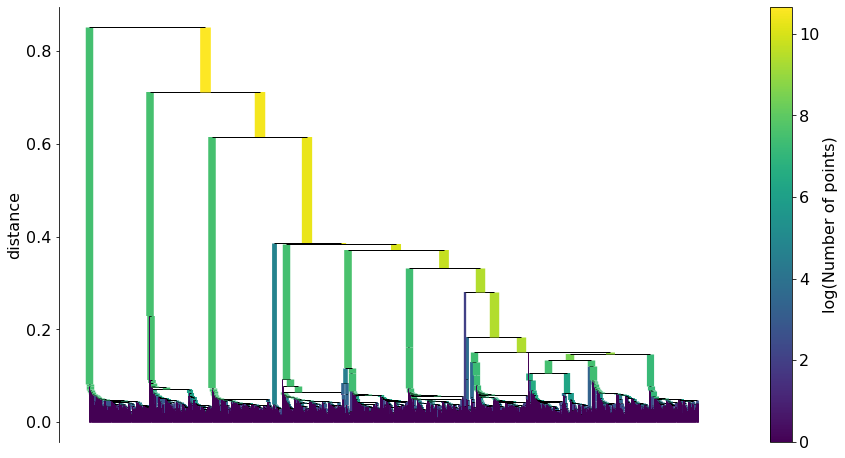

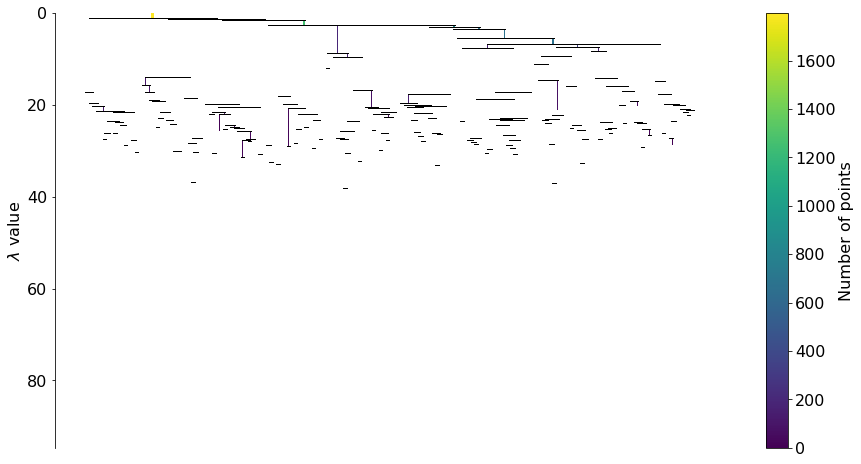

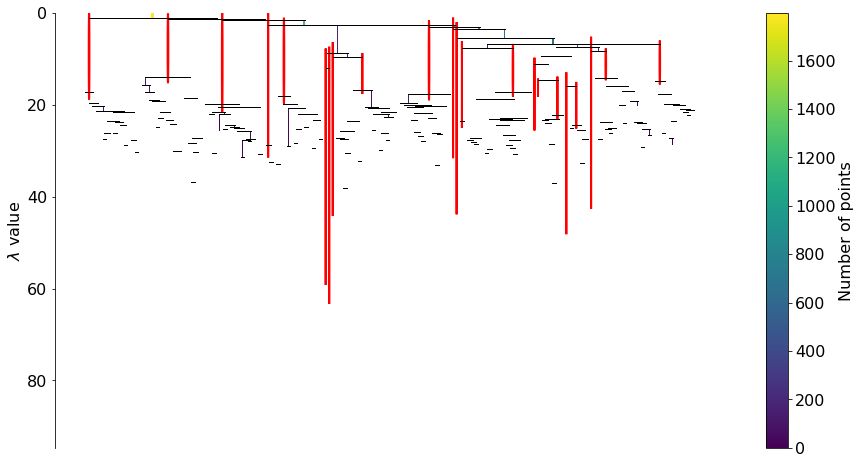

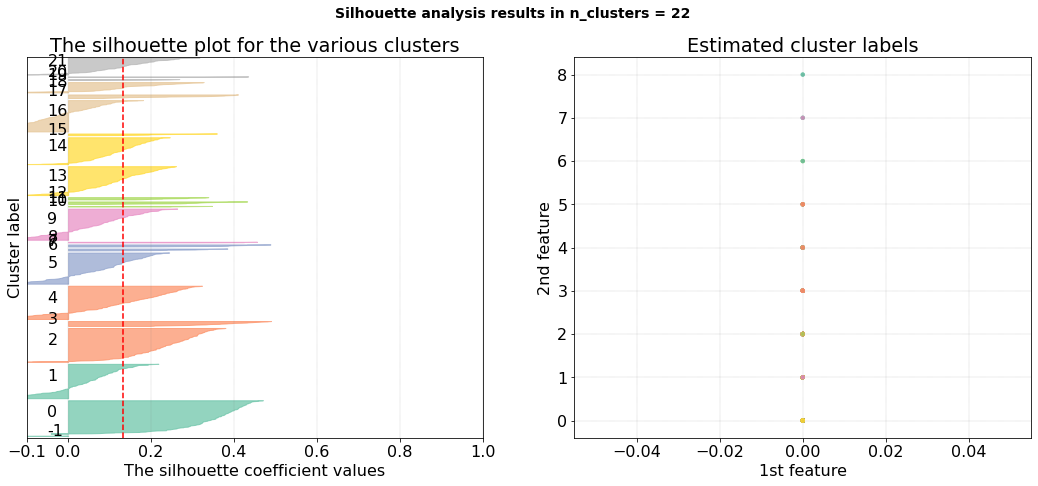

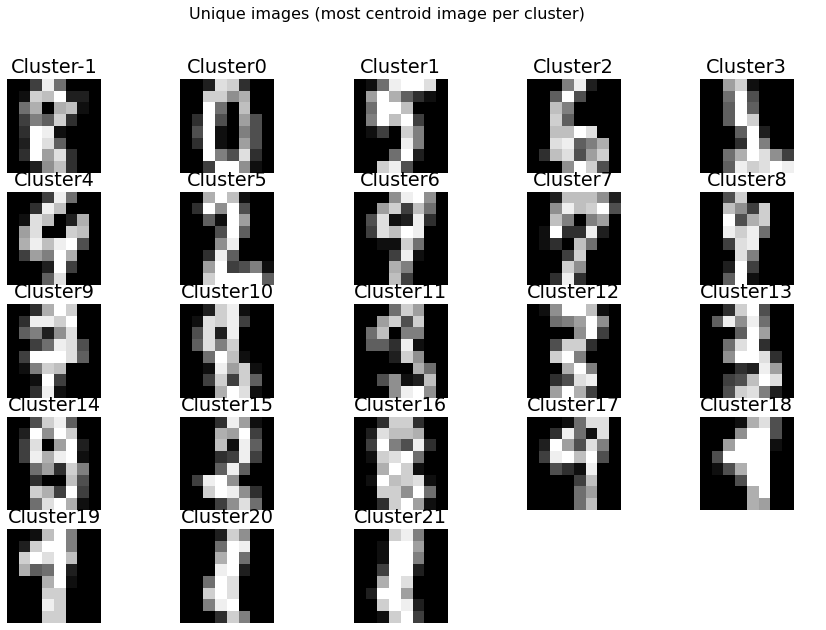

[colourmap]> Warning: Colormap [Set1] can not create [23] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [23] unique colors! Available unique colors: [9].


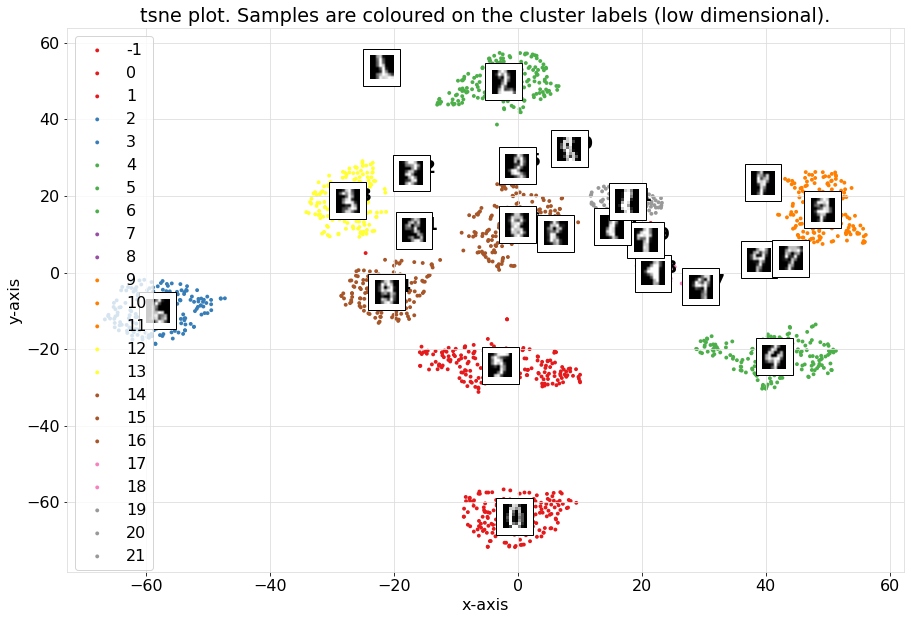

[clusteval] >Plotting the dendrogram with optimized settings: metric=euclidean, linkage=ward, max_d=130.087. Be patient now..
[clusteval] >Compute cluster labels.


<Figure size 432x288 with 0 Axes>

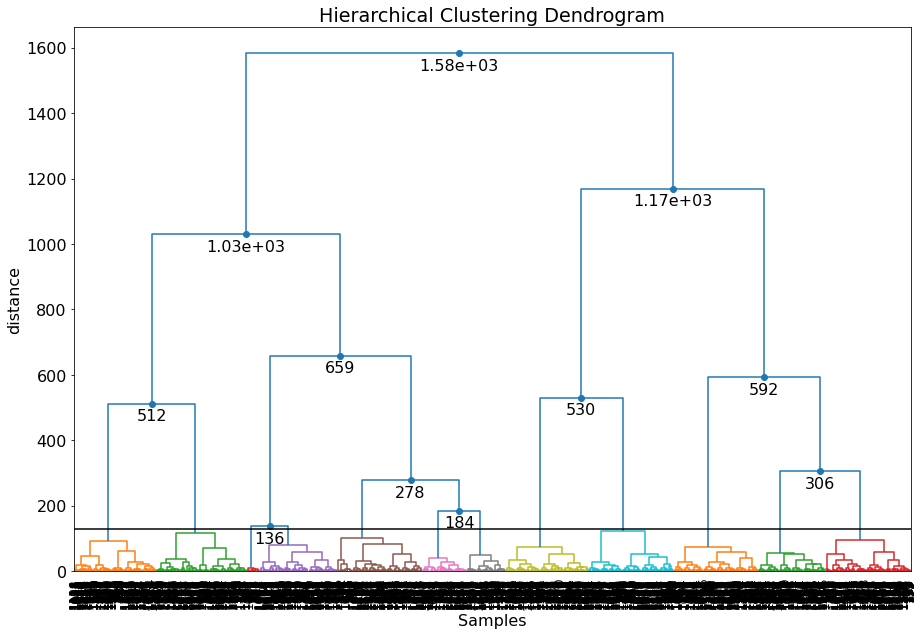

In [14]:
# Silhouette plots
cl.clusteval.plot()
cl.clusteval.scatter(X)

# Plot unique image per cluster
cl.plot_unique(img_mean=False)

# Scatterplot
cl.scatter(zoom=3, img_mean=False)

# Dendrogram
cl.dendrogram()

In [15]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(X)


HDBSCAN(gen_min_span_tree=True)

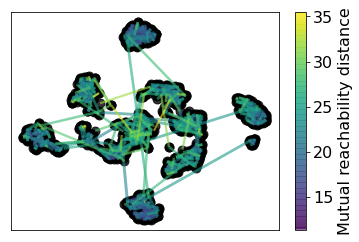

In [16]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

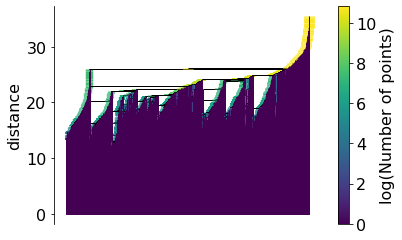

In [17]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

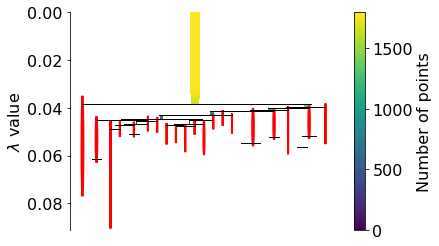

In [20]:
import seaborn as sns
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

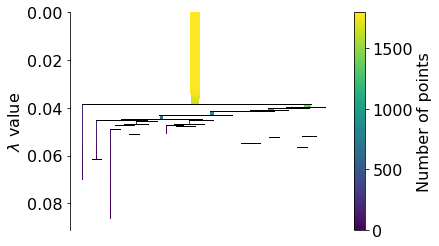

In [18]:
clusterer.condensed_tree_.plot()

In [21]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(X.T[0], X.T[1], c=cluster_colors, **plot_kwds)

IndexError: ignored

DBSCAN Implementation


In [6]:
# Load MNIST example data
X = cl.import_example(data='mnist')
#X = cl.import_data(train_data)

# There are 1797 digits in total, each with 64 features which is the flattened 8x8 grayscale image.
print(X.shape)
# (1797, 64)

# print(X)
# array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
#        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
#        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
#        ...,
#        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
#        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
#        [ 0.,  0., 10., ..., 12.,  1.,  0.]])

# Preprocessing, feature extraction, embedding and cluster evaluation
results = cl.fit_transform(X,
                           cluster='dbscan',
                           evaluate='silhouette',
                           metric='euclidean',
                           linkage='ward',
                           min_clust=3,
                           max_clust=25,
                           cluster_space='low')

(1797, 64)
[pca] >Column labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [64] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [29] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [64] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.

[clusteval] >Fit using dbscan with metric: euclidean, and linkage: ward
[clusteval] >Gridsearch across epsilon..
[clusteval] >Evaluate using silhouette..


100%|██████████| 245/245 [00:40<00:00,  6.10it/s]


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [14].
[clusteval] >Fin.


Plat diagrams for DBSCAN results

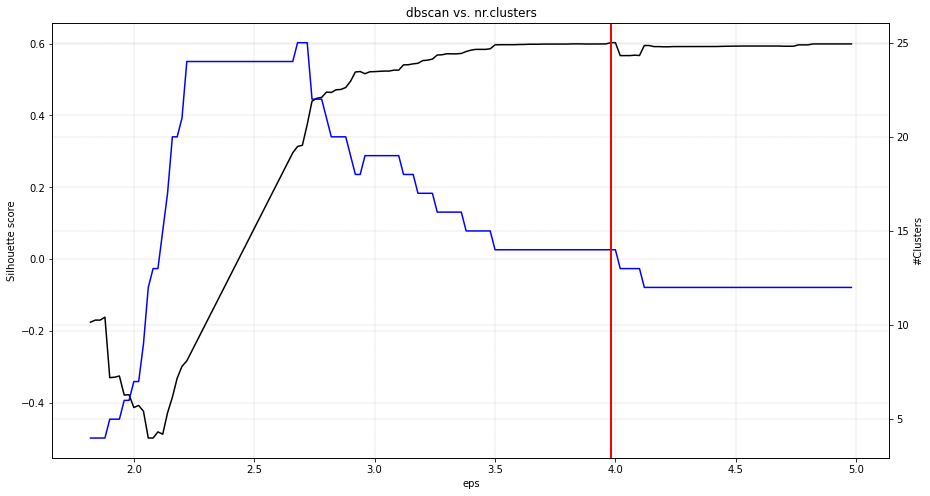

[clusteval] >Estimated number of n_clusters: 13, average silhouette_score=0.168


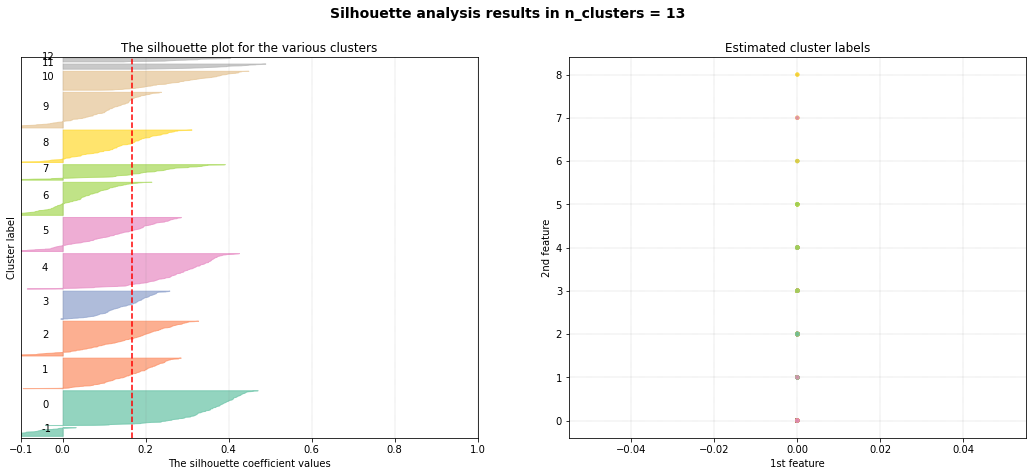

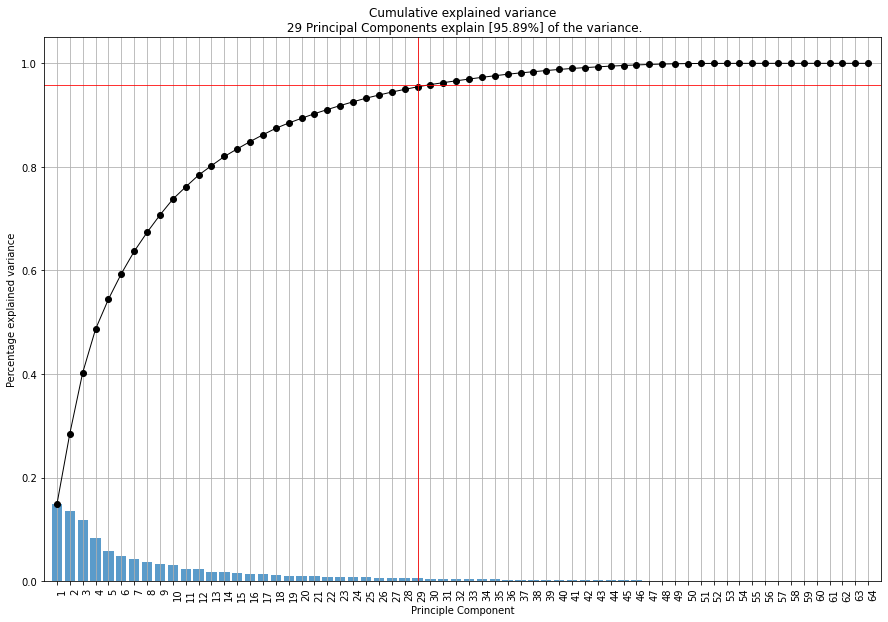

<Figure size 432x288 with 0 Axes>

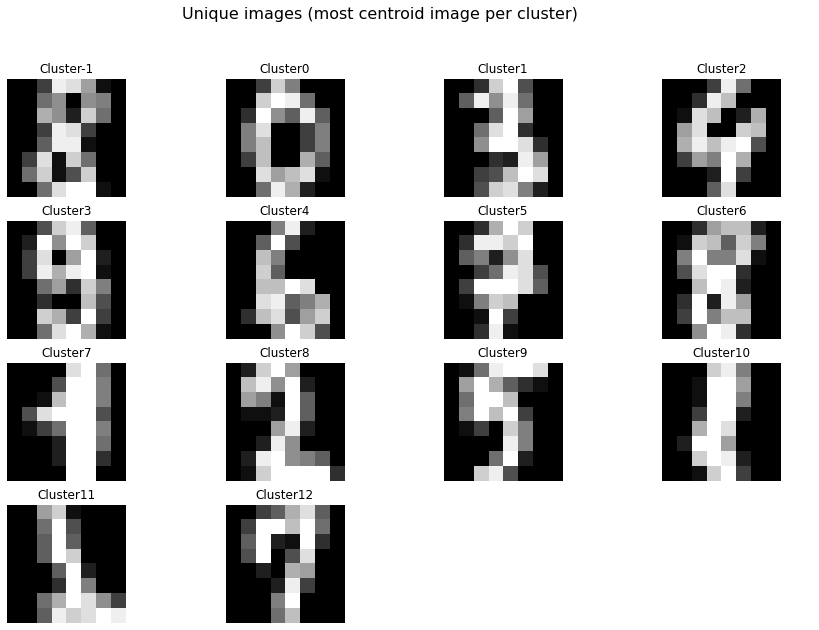

[colourmap]> Warning: Colormap [Set1] can not create [14] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [14] unique colors! Available unique colors: [9].


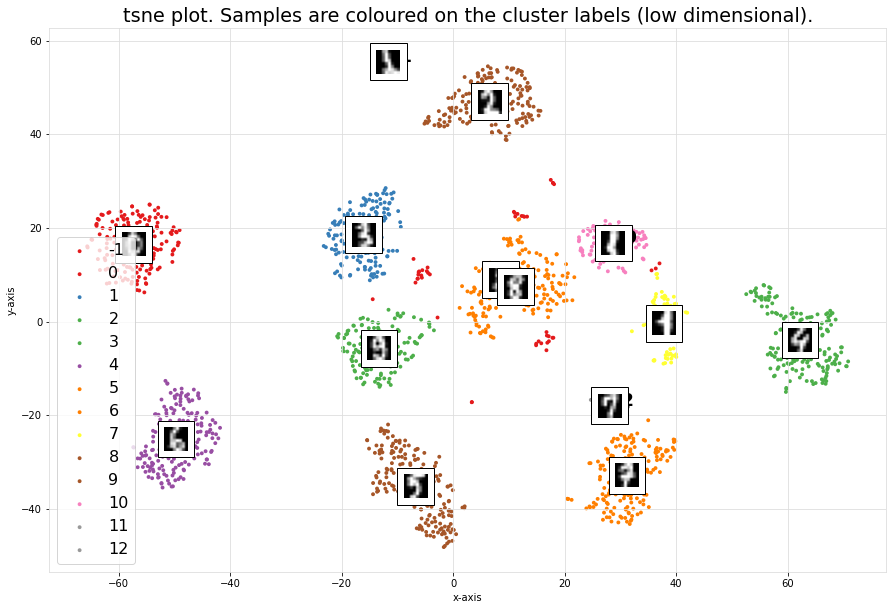

[colourmap]> Warning: Colormap [Set1] can not create [14] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [14] unique colors! Available unique colors: [9].


<Figure size 432x288 with 0 Axes>

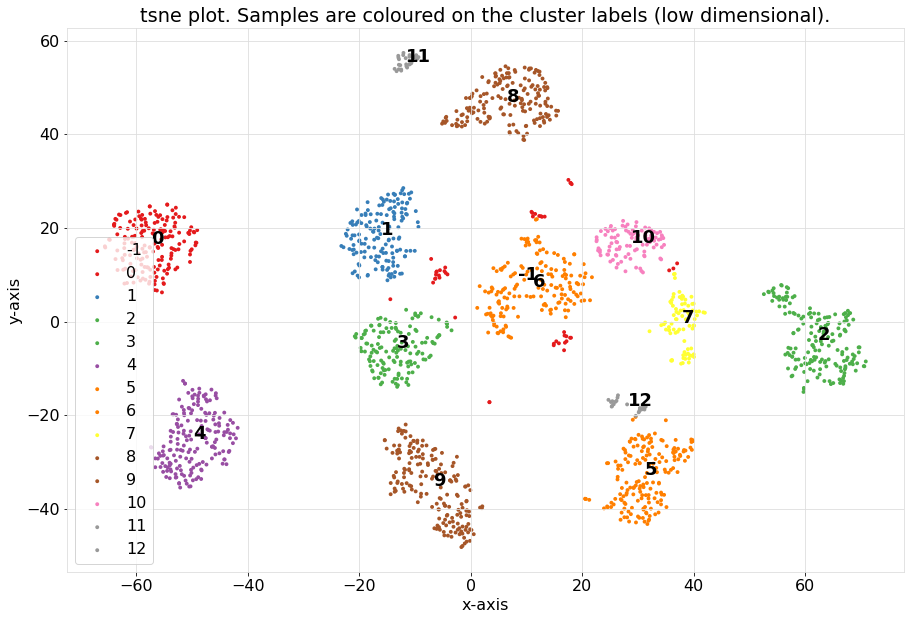

[clusteval] >Plotting the dendrogram with optimized settings: metric=euclidean, linkage=ward, max_d=102.979. Be patient now..
[clusteval] >Compute cluster labels.


<Figure size 432x288 with 0 Axes>

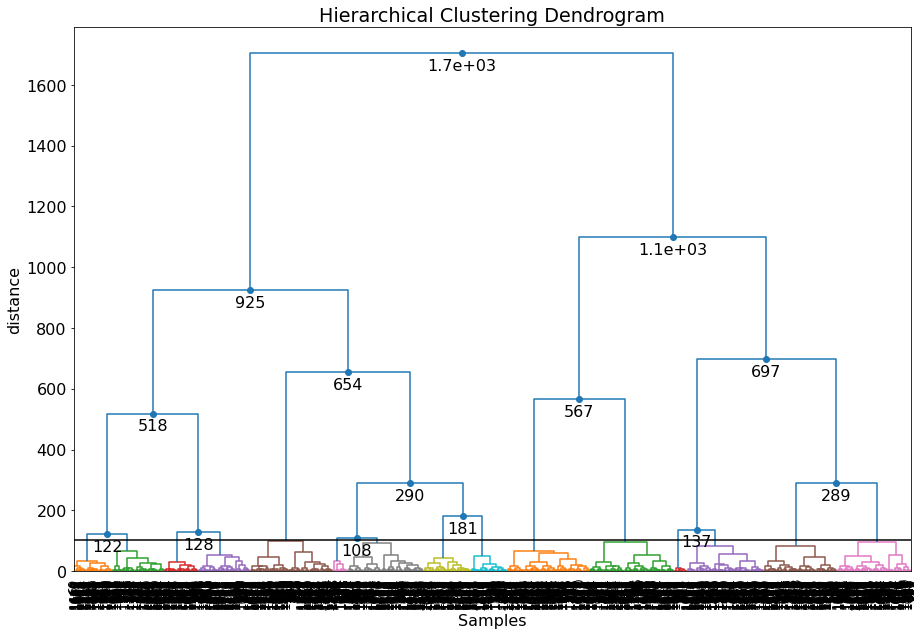

In [7]:
# Silhouette plots
cl.clusteval.plot()
cl.clusteval.scatter(X)

# PCA explained variance plot
cl.pca.plot()

# Plot unique image per cluster
cl.plot_unique(img_mean=False)

# Scatterplot
cl.scatter(zoom=3, img_mean=False)
cl.scatter(zoom=None, img_mean=False)

# Plot images per cluster or all clusters
#cl.plot(cmap='binary', labels=[1,2])

# Dendrogram
cl.dendrogram()

Following is Agglomerative clustering after PCA.

In [14]:
# Load MNIST example data
X = cl.import_example(data='mnist')
#X = cl.import_data(train_data)

# There are 1797 digits in total, each with 64 features which is the flattened 8x8 grayscale image.
print(X.shape)
# (1797, 64)

# print(X)
# array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
#        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
#        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
#        ...,
#        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
#        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
#        [ 0.,  0., 10., ..., 12.,  1.,  0.]])

# Preprocessing, feature extraction, embedding and cluster evaluation
results = cl.fit_transform(X,
                           cluster='agglomerative',
                           evaluate='silhouette',
                           metric='euclidean',
                           linkage='ward',
                           min_clust=3,
                           max_clust=25,
                           cluster_space='high')

(1797, 64)
[pca] >Column labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [64] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [29] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [64] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.

[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 22/22 [00:01<00:00, 12.46it/s]


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [14].
[clusteval] >Fin.


In [8]:
cl.results.keys()

dict_keys(['img', 'feat', 'xycoord', 'pathnames', 'labels', 'url', 'filenames'])

In [10]:
cl.results['img']

array([[  0,   0,  85, ...,   0,   0,   0],
       [  0,   0,   0, ..., 159,   0,   0],
       [  0,   0,   0, ..., 255, 143,   0],
       ...,
       [  0,   0,  15, ...,  95,   0,   0],
       [  0,   0,  31, ..., 191,   0,   0],
       [  0,   0, 159, ..., 191,  15,   0]], dtype=uint8)

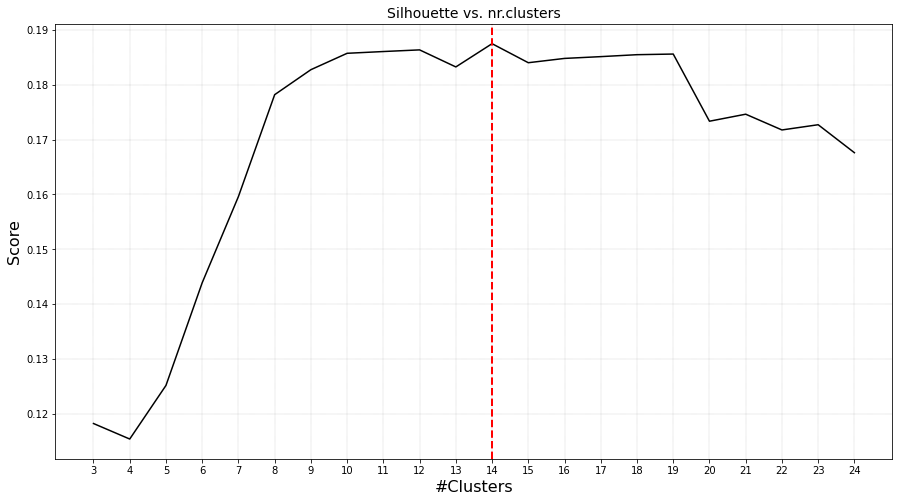

[clusteval] >Estimated number of n_clusters: 14, average silhouette_score=0.176


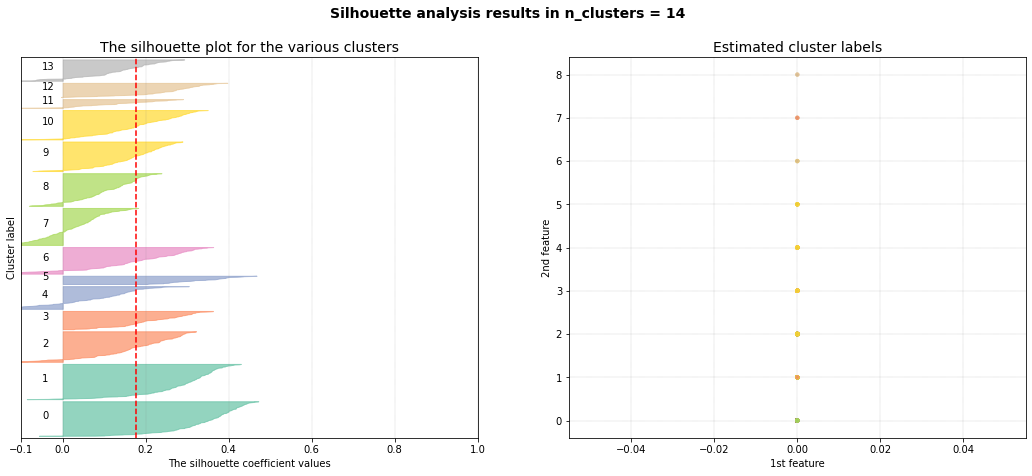

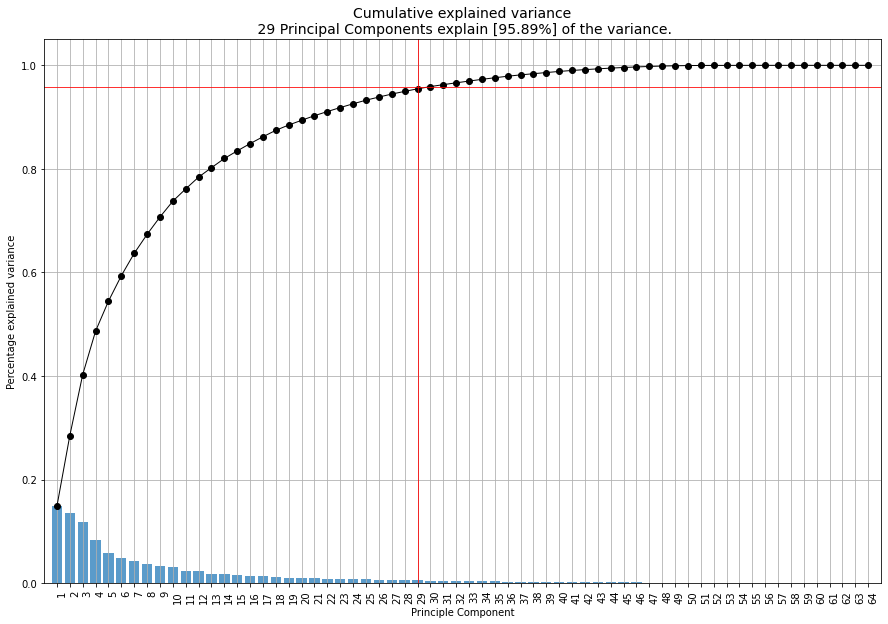

<Figure size 432x288 with 0 Axes>

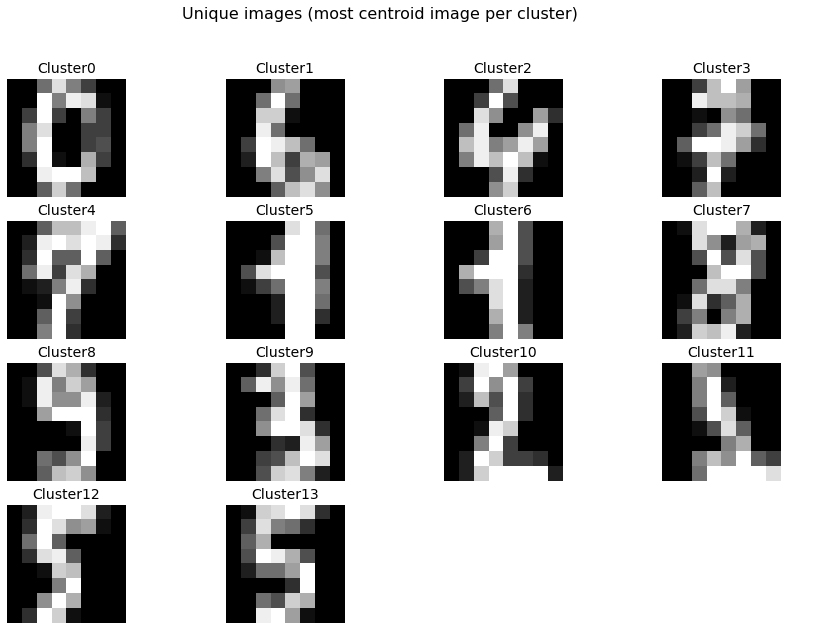

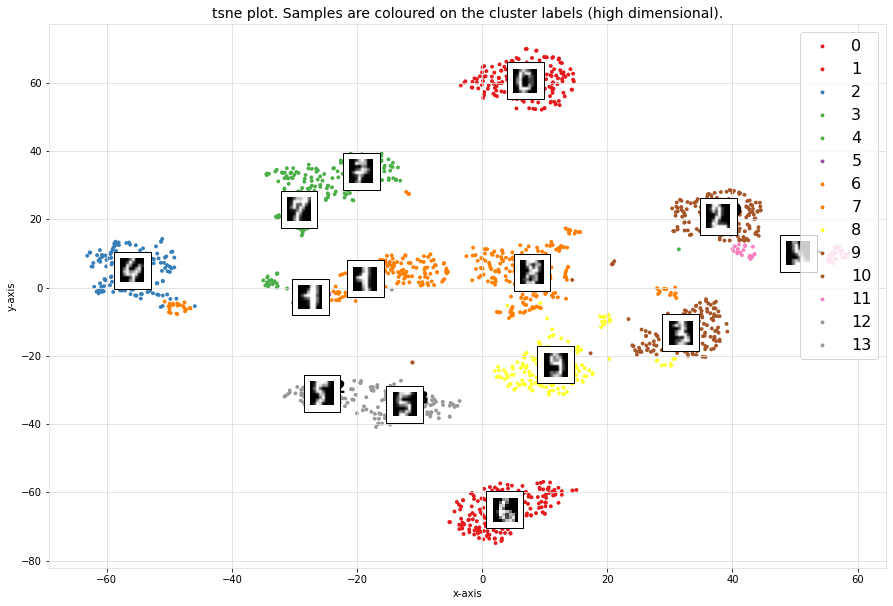

<Figure size 432x288 with 0 Axes>

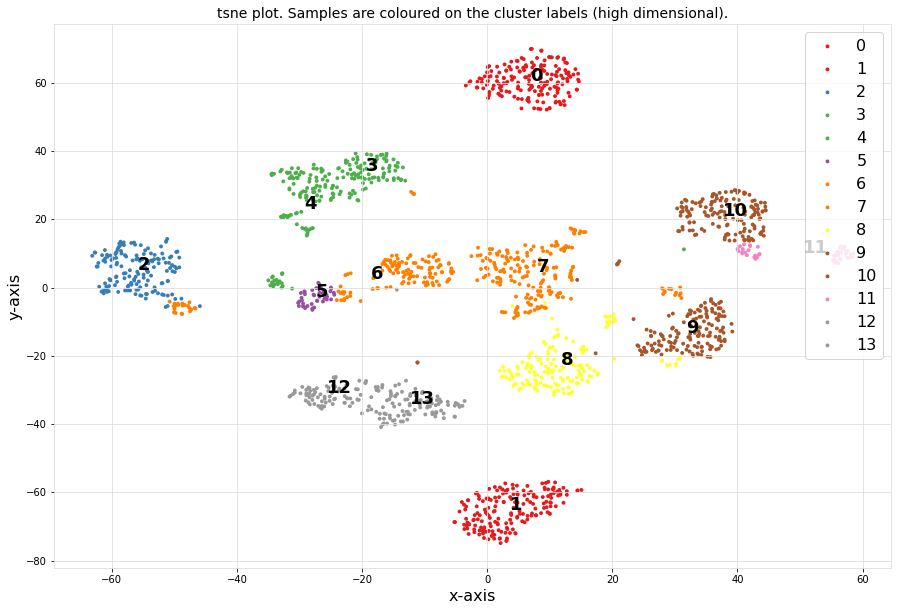

[clusteval] >Plotting the dendrogram with optimized settings: metric=euclidean, linkage=ward, max_d=3362.751. Be patient now..
[clusteval] >Compute cluster labels.


<Figure size 432x288 with 0 Axes>

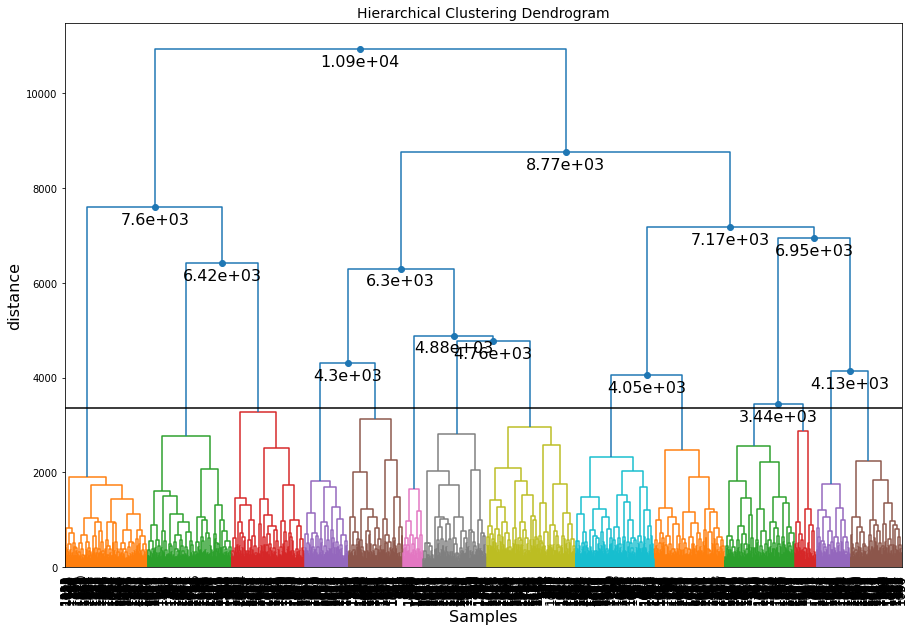

In [15]:
# Silhouette plots
cl.clusteval.plot()
cl.clusteval.scatter(X)

# PCA explained variance plot
cl.pca.plot()

# Plot unique image per cluster
cl.plot_unique(img_mean=False)

# Scatterplot
cl.scatter(zoom=3, img_mean=False)
cl.scatter(zoom=None, img_mean=False)

# Plot images per cluster or all clusters
#cl.plot(cmap='binary', labels=[1,2])

# Dendrogram
cl.dendrogram()


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 22/22 [00:01<00:00, 12.09it/s]


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [16].
[clusteval] >Fin.


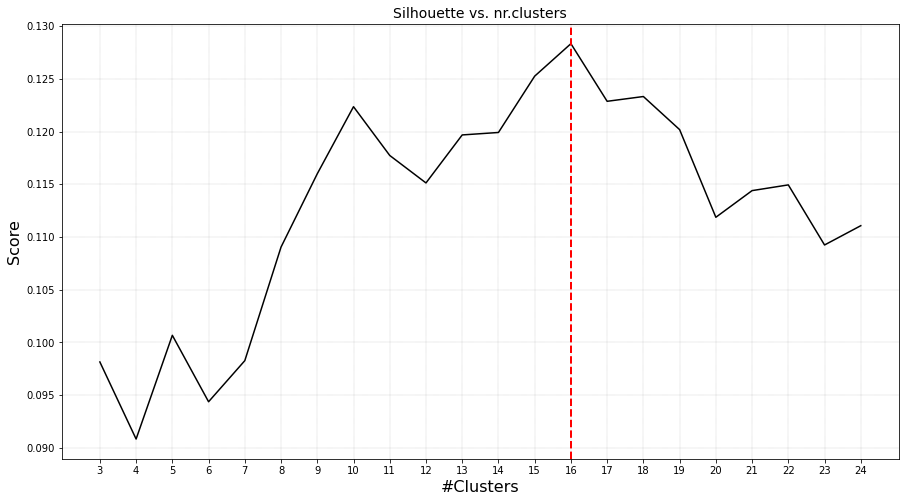

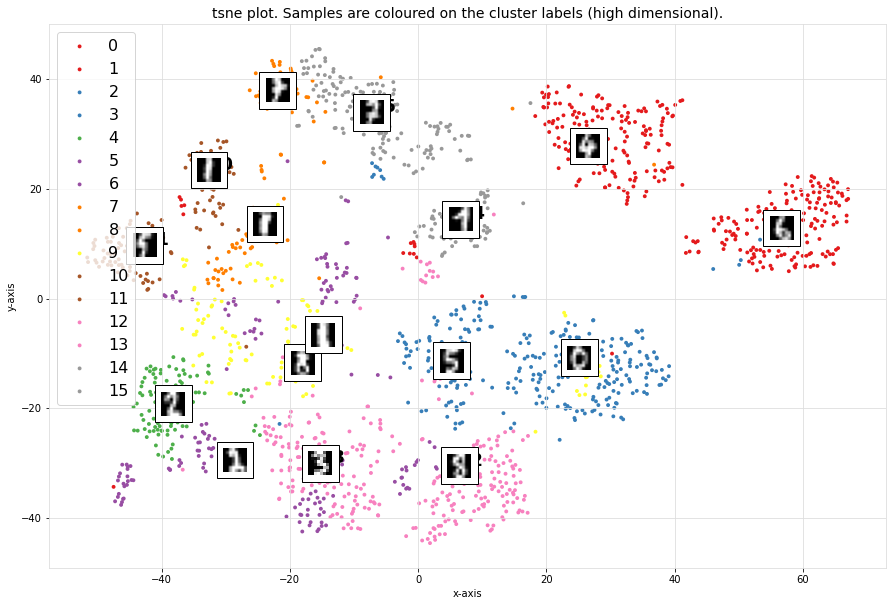

<Figure size 432x288 with 0 Axes>

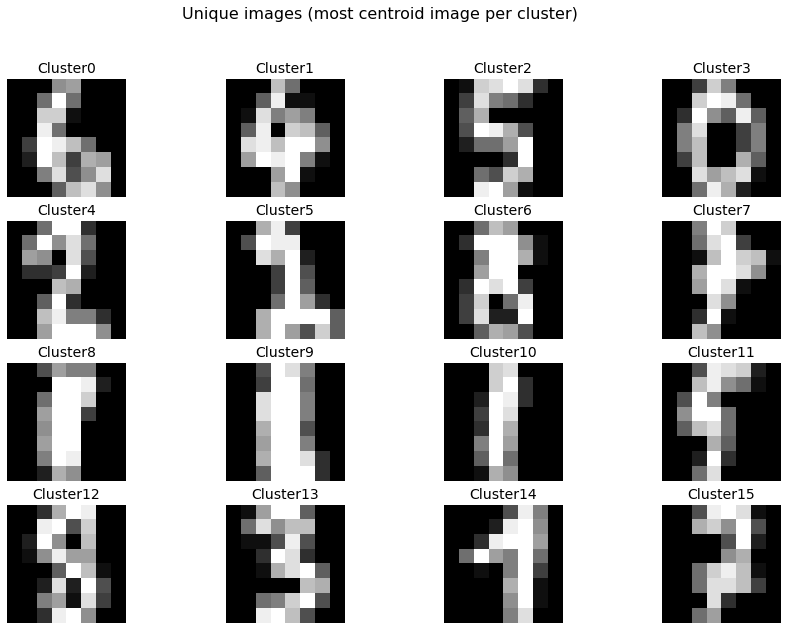

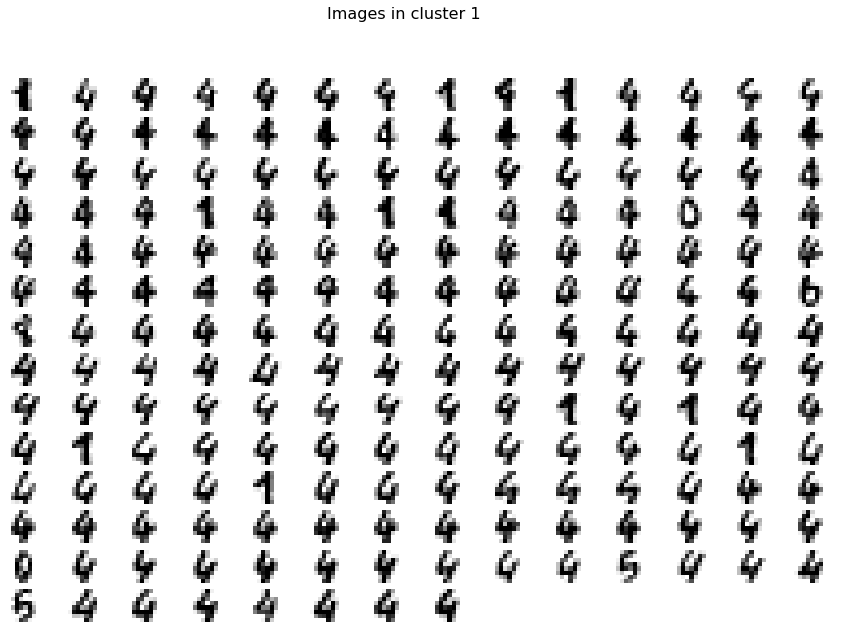

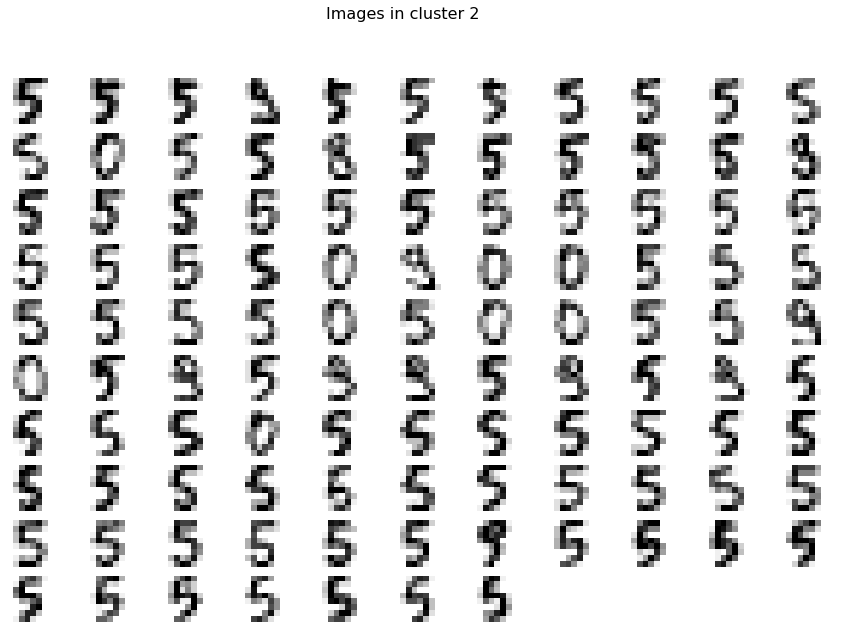

[clusteval] >Plotting the dendrogram with optimized settings: metric=euclidean, linkage=ward, max_d=890.717. Be patient now..
[clusteval] >Compute cluster labels.


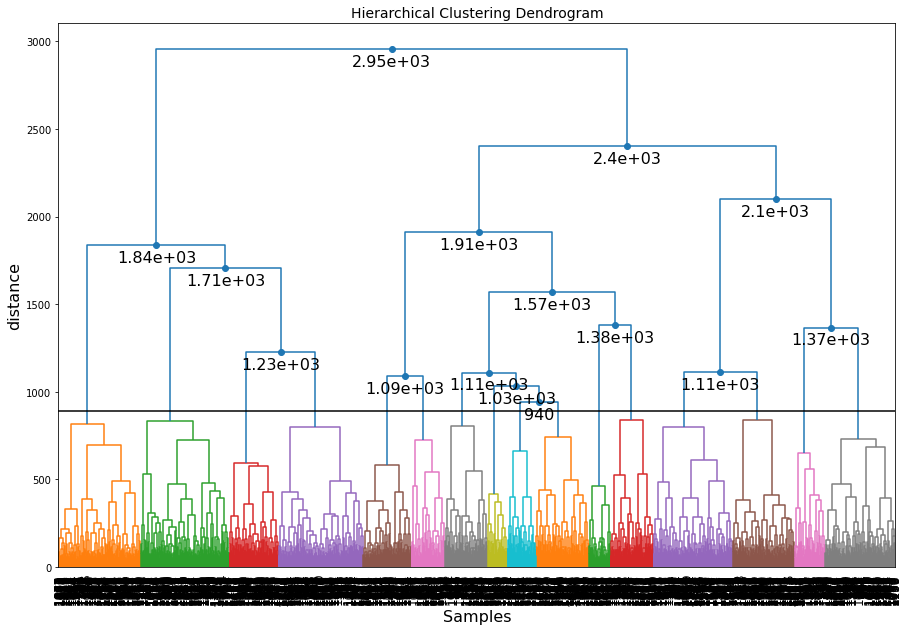

In [16]:
# init with HOG method
cl = Clustimage(method='hog', params_hog={'pixels_per_cell':(2,2)}, verbose=50)

# Load MNIST example data
X = cl.import_example(data='mnist')

# Preprocessing, feature extraction, embedding and cluster evaluation
results = cl.fit_transform(X)

# Plot
cl.clusteval.plot()
cl.scatter(zoom=3, img_mean=False)

cl.extract_hog()
# Plot unique image per cluster
cl.plot_unique(img_mean=False)

# Plot images per cluster or all clusters
cl.plot(cmap='binary', labels=[1,2])

# Dendrogram
cl.dendrogram()

In [22]:
# Initialize with HOG
cl = Clustimage(method='hog', params_hog={'orientations':8, 'pixels_per_cell':(8,8), 'cells_per_block':(1,1)})

# Load example data
X = cl.import_example(data='mnist')

# Check whether in is dir, list of files or array-like
X = cl.import_data(X)
# Extract features using method
Xfeat = cl.extract_feat(X)
# Alternatively, the features are also stored in the results dict
cl.results['feat']

# Alternatively, the features are also stored in the results dict using the run-at-once function.
X = cl.import_example(data='mnist')
# Fit and transform
results = cl.fit_transform(X)
# Extracted PC features
results['feat']

img_hog = cl.extract_hog(Xfeat)

[clustimage] >WARNING> Parameter grayscale is set to True coz you are using method="hog"
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Scaling images..
[clustimage] >INFO> Writing images to tempdir [/tmp/clustimage]
100%|██████████| 1797/1797 [00:00<00:00, 7806.16it/s]
[clustimage] >INFO> Extracting features using method: [hog]
100%|██████████| 1797/1797 [00:00<00:00, 3640.19it/s]
[clustimage] >INFO> Extracted features using [hog]: samples=1797, features=64
[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Scaling images..
[clustimage] >INFO> Writing images to tempdir [/tmp/clustimage]
100%|██████████| 1797/1797 [00:00<00:00, 8245.16it/s]
[clustimage] >INFO> Extracting features using method: [hog]
100%|██████████| 1797


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 22/22 [00:02<00:00,  9.17it/s]
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (1797, 64) feature-space.


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [3].
[clusteval] >Fin.


100%|██████████| 1797/1797 [00:00<00:00, 14344.37it/s]


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
[pca] >Column labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [4096] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [127] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [4096] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.

[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 16/16 [00:00<00:00, 167.87it/s]

[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [19].
[clusteval] >Fin.


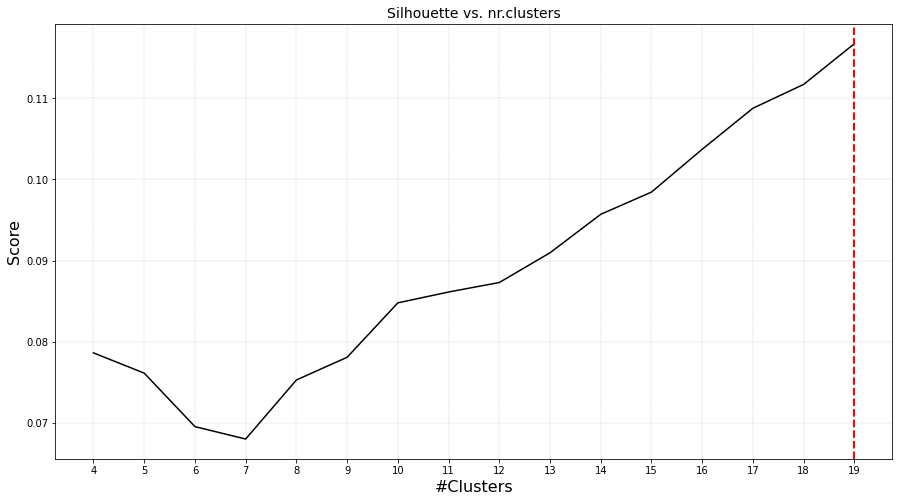

[clusteval] >Estimated number of n_clusters: 19, average silhouette_score=0.141


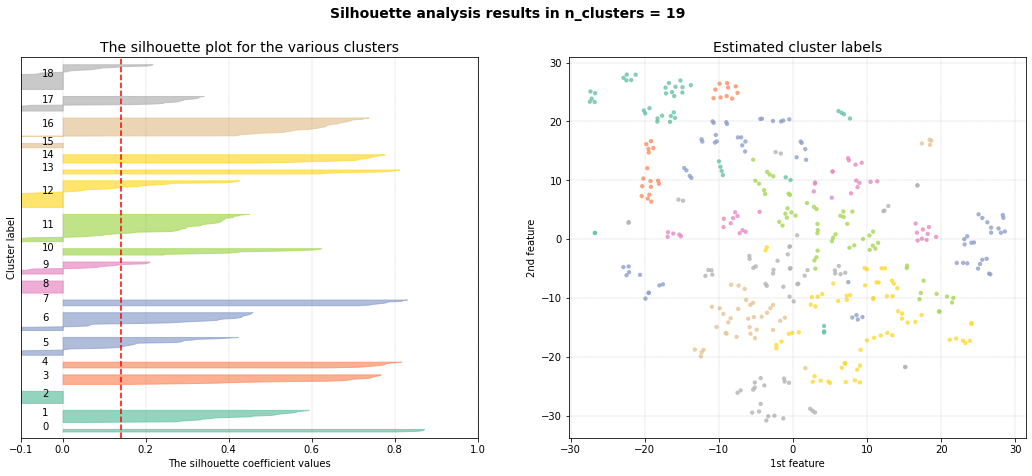

[clusteval] >Plotting the dendrogram with optimized settings: metric=euclidean, linkage=ward, max_d=8073.993. Be patient now..
[clusteval] >Compute cluster labels.


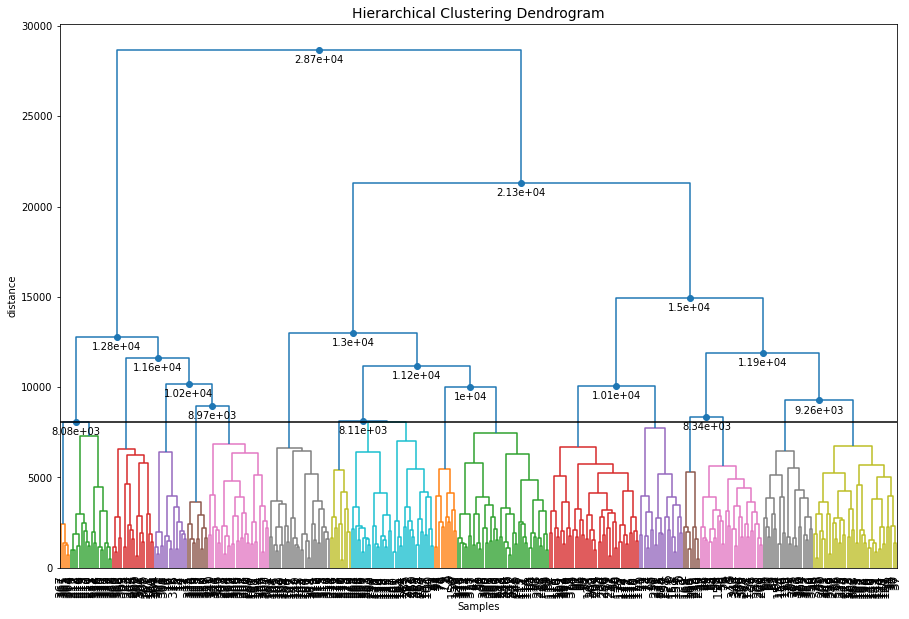

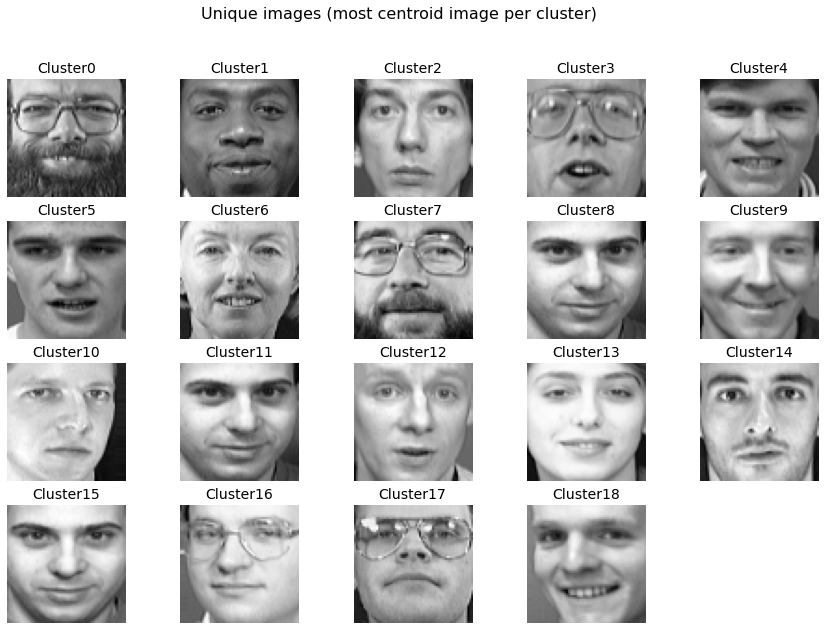

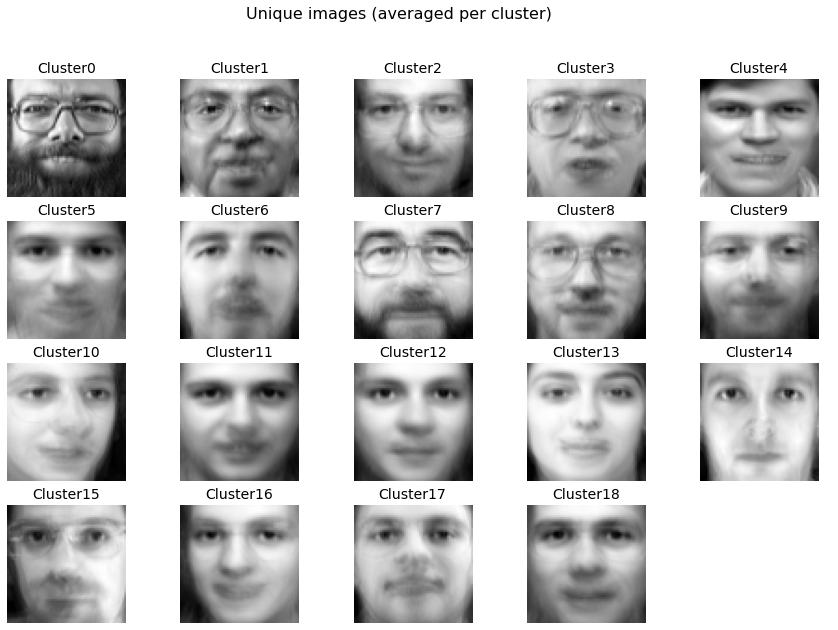

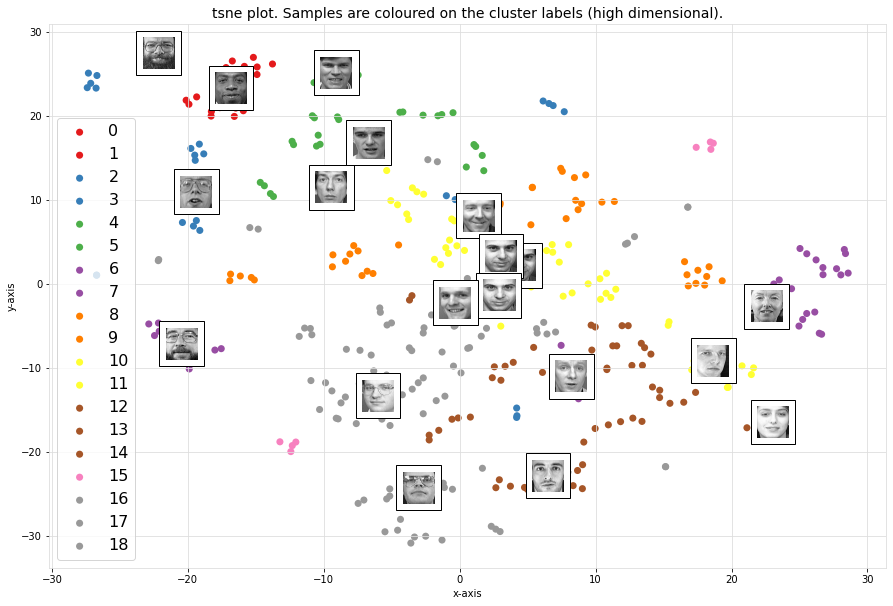

<Figure size 432x288 with 0 Axes>

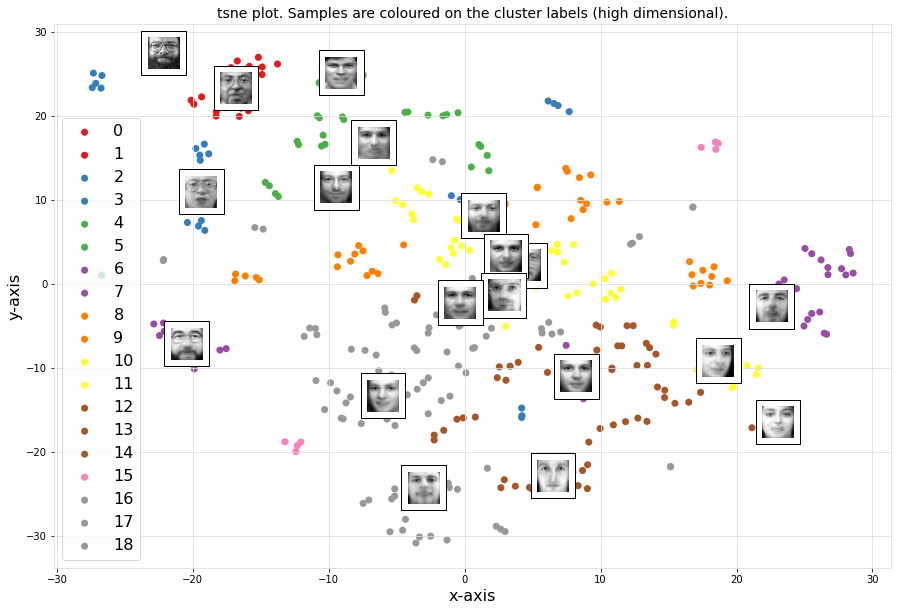

<Figure size 432x288 with 0 Axes>

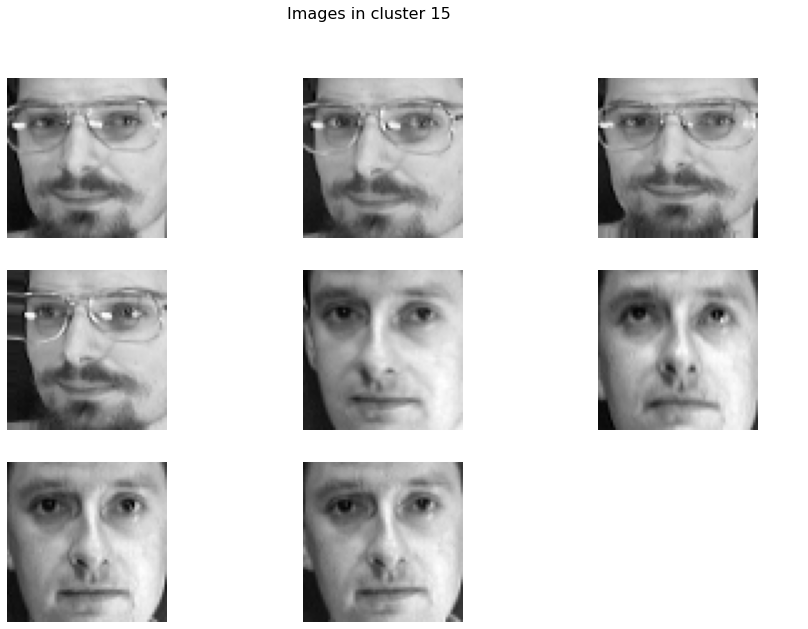

In [9]:
# Import library
from clustimage import Clustimage

# init
cl = Clustimage(method='pca', grayscale=False, dim=(64,64), verbose=50)

# Load example with faces
X = cl.import_example(data='faces')

# Preproceesing, cluster detection
results = cl.fit_transform(X, min_clust=4, max_clust=20)

# Make various plots:

# Silhouette plots
cl.clusteval.plot()
cl.clusteval.scatter(cl.results['xycoord'])

# Dendrogram
cl.dendrogram()

# Plot unique image per cluster
cl.plot_unique(img_mean=False)
cl.plot_unique(img_mean=True)

# Scatterplot
cl.scatter(dotsize=50, zoom=0.5, img_mean=False)
cl.scatter(dotsize=50, zoom=0.5, img_mean=True)

# Plot images per cluster or all clusters
cl.plot(labels=15)

In [35]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


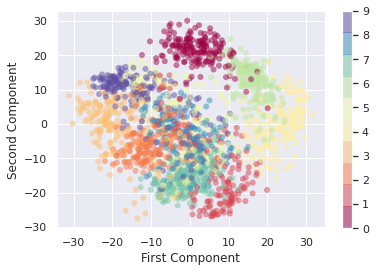

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.colorbar();

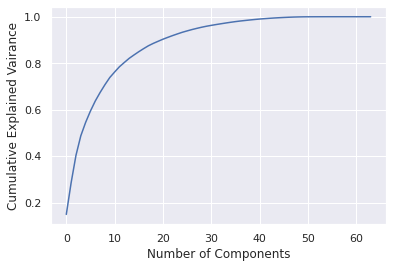

In [44]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Vairance');

In [52]:
# Initialize with HOG
cl = Clustimage(method='hog', params_hog={'orientations':8, 'pixels_per_cell':(8,8), 'cells_per_block':(1,1)})

# Load example data
X = cl.import_example(data='mnist')

# Check whether in is dir, list of files or array-like
X = cl.import_data(X)
# Extract features using method
Xfeat = cl.extract_feat(X)
# Alternatively, the features are also stored in the results dict
cl.results['feat']

# Alternatively, the features are also stored in the results dict using the run-at-once function.
X = cl.import_example(data='mnist')
# Fit and transform
results = cl.fit_transform(X)
# Extracted PC features
results['feat']

[clustimage] >WARNING> Parameter grayscale is set to True coz you are using method="hog"
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Scaling images..
[clustimage] >INFO> Writing images to tempdir [/tmp/clustimage]
100%|██████████| 1797/1797 [00:00<00:00, 8643.87it/s]
[clustimage] >INFO> Extracting features using method: [hog]
100%|██████████| 1797/1797 [00:00<00:00, 3584.81it/s]
[clustimage] >INFO> Extracted features using [hog]: samples=1797, features=64
[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Scaling images..
[clustimage] >INFO> Writing images to tempdir [/tmp/clustimage]
100%|██████████| 1797/1797 [00:00<00:00, 3160.17it/s]
[clustimage] >INFO> Extracting features using method: [hog]
100%|██████████| 1797


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 22/22 [00:01<00:00, 12.07it/s]
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (1797, 64) feature-space.


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [3].
[clusteval] >Fin.


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
# init with PCA method
cl = Clustimage(method='hog',
                embedding='tsne',
                grayscale=False,
                dim=(128,128),
                params_pca={'n_components':0.95},
                store_to_disk=True,
                verbose=50)

In [50]:
# Load MNIST example data
X = cl.import_example(data='mnist')
#X = cl.import_data(train_data)

# There are 1797 digits in total, each with 64 features which is the flattened 8x8 grayscale image.
print(X.shape)
# (1797, 64)

# print(X)
# array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
#        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
#        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
#        ...,
#        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
#        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
#        [ 0.,  0., 10., ..., 12.,  1.,  0.]])

# Preprocessing, feature extraction, embedding and cluster evaluation
results = cl.fit_transform(X,
                           cluster='kmeans',
                           evaluate='silhouette',
                           metric='euclidean',
                           linkage='ward',
                           min_clust=3,
                           max_clust=25,
                           cluster_space='high')

(1797, 64)

[clusteval] >Fit using kmeans with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 22/22 [00:18<00:00,  1.21it/s]

[clusteval] >Optimal number clusters detected: [3].
[clusteval] >Fin.


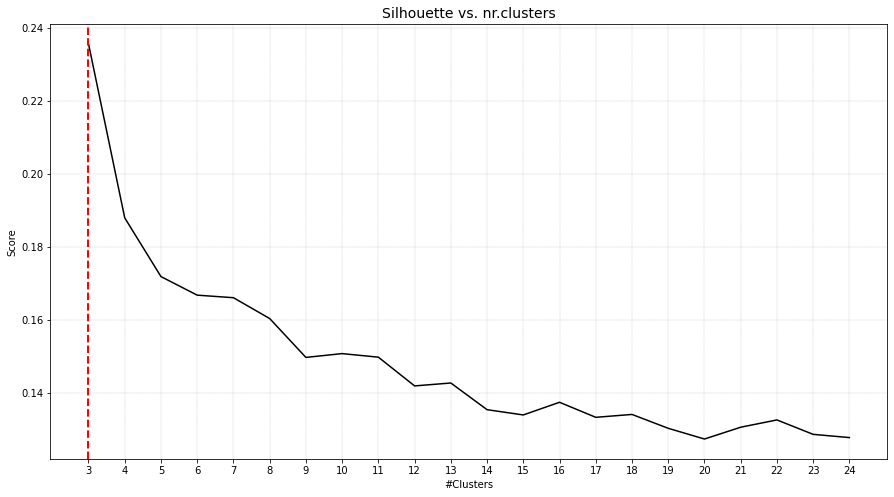

[clusteval] >Estimated number of n_clusters: 2, average silhouette_score=0.028


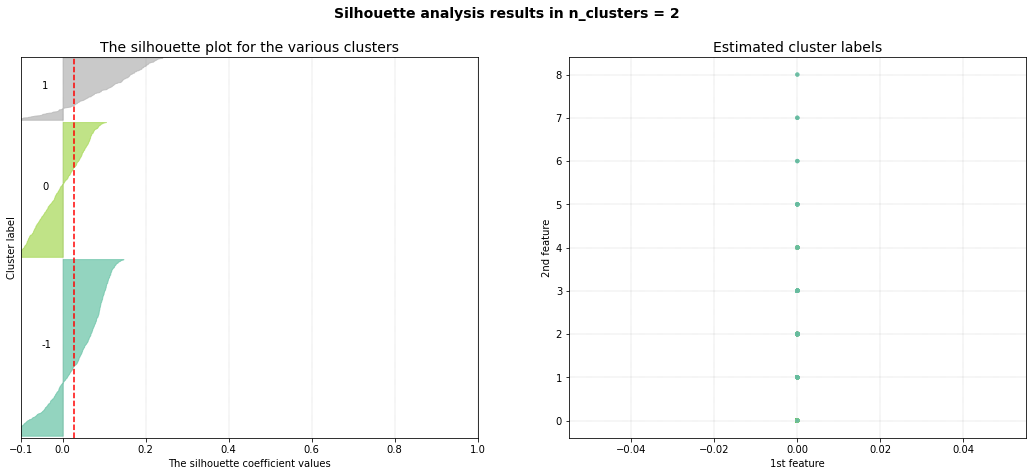

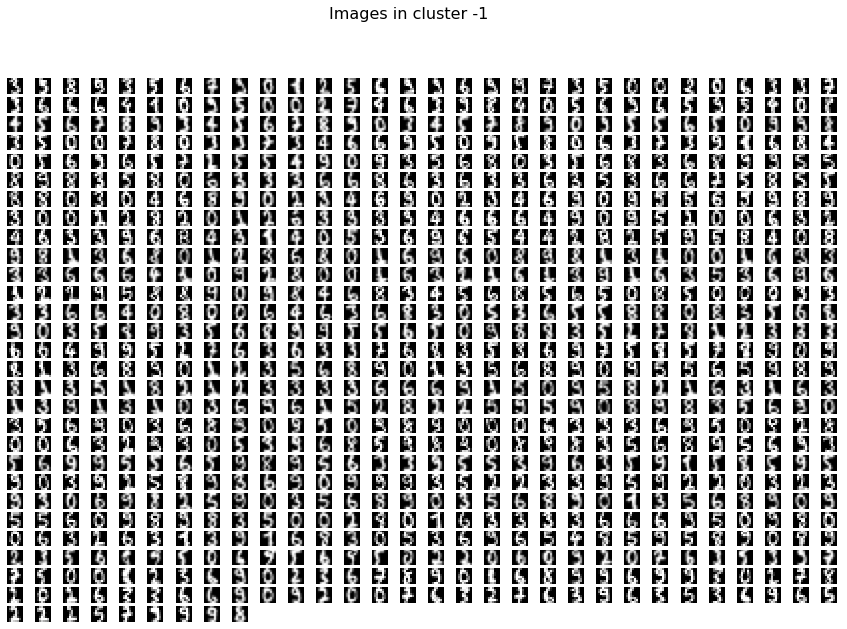

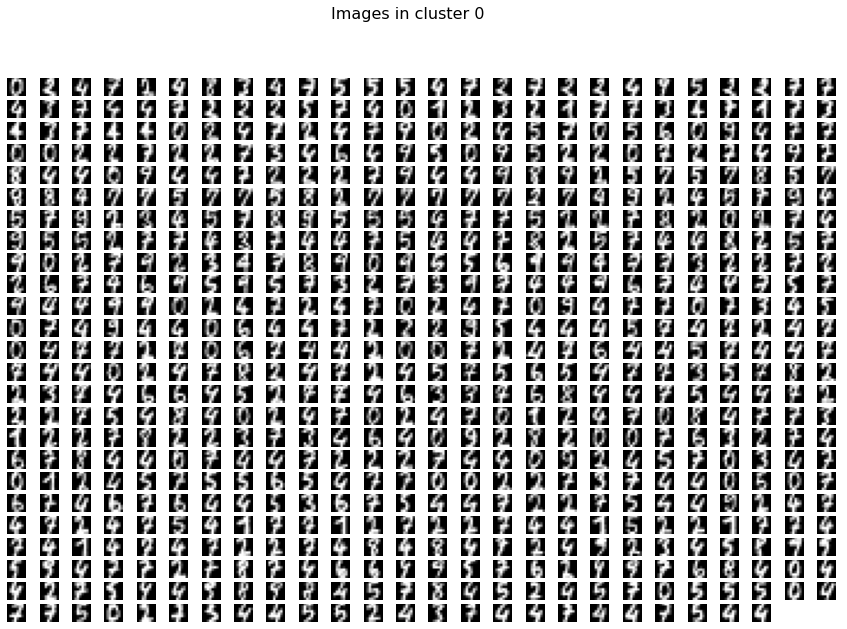

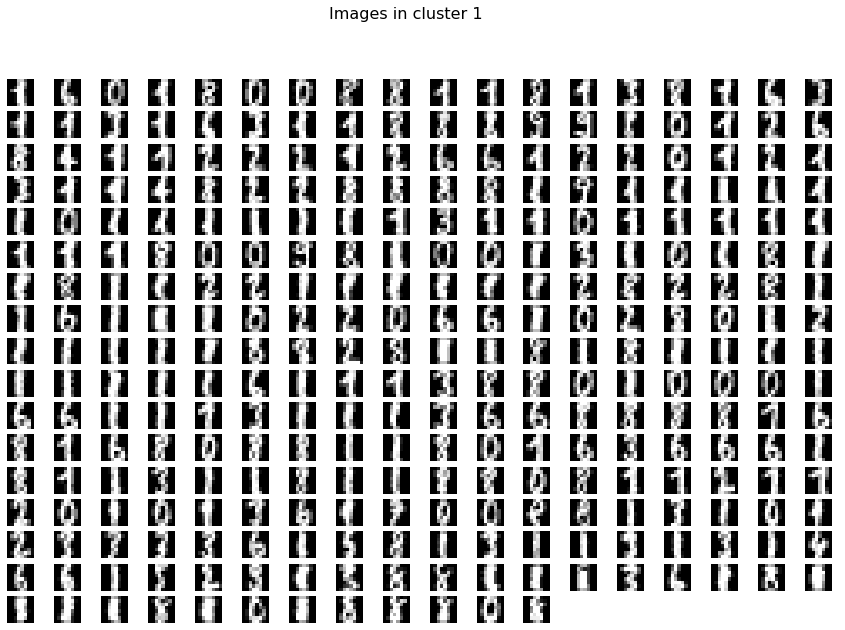

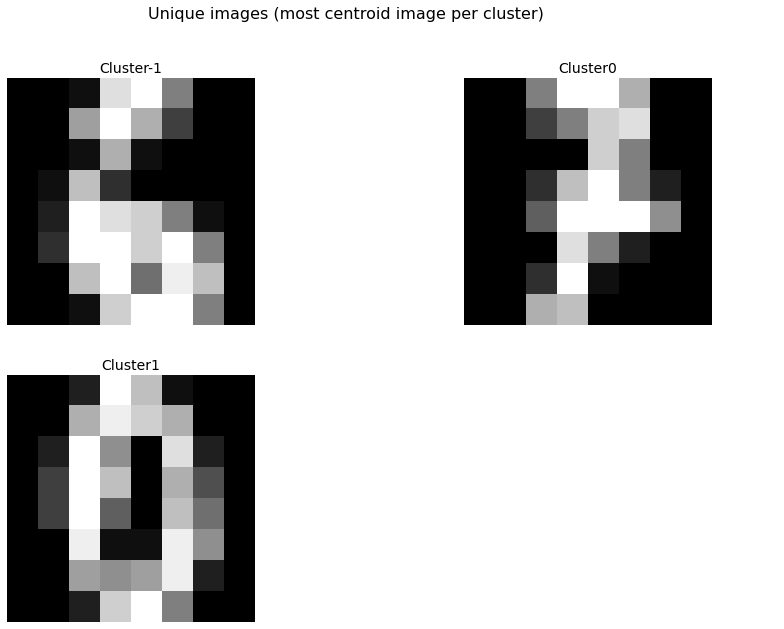

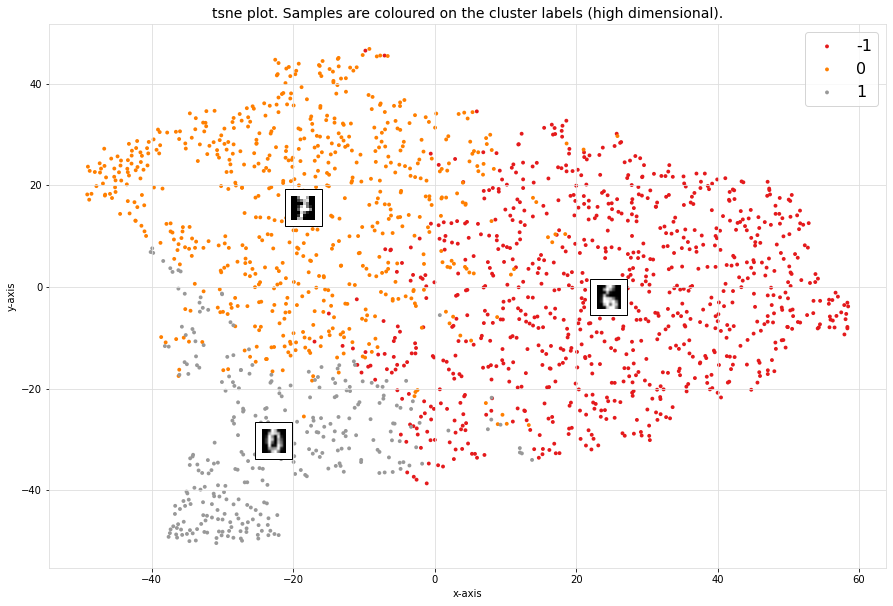

<Figure size 432x288 with 0 Axes>

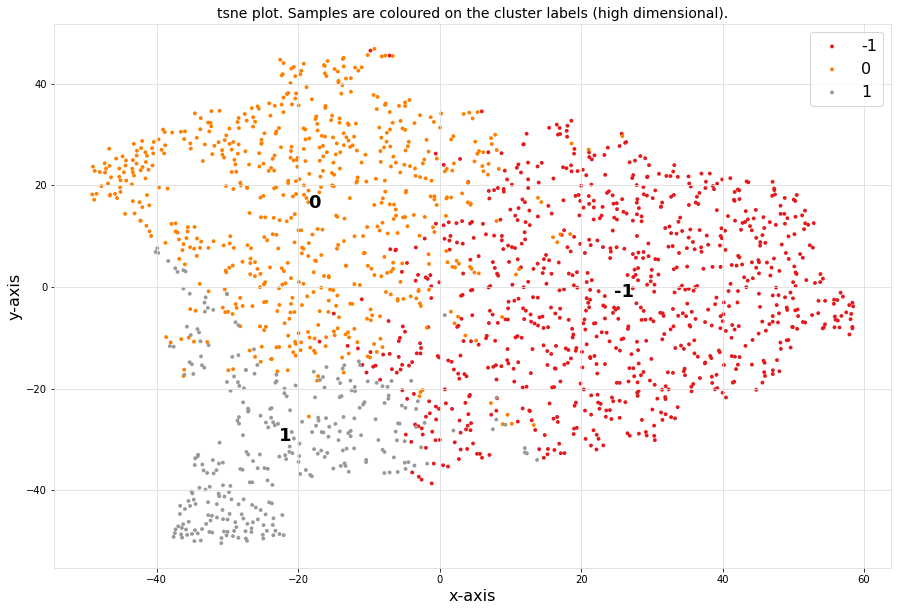

TypeError: ignored

<Figure size 432x288 with 0 Axes>

In [52]:
# Silhouette plots
cl.clusteval.plot()
cl.clusteval.scatter(X)

# PCA explained variance plot
cl.plot()

# Plot unique image per cluster
cl.plot_unique(img_mean=False)

# Scatterplot
cl.scatter(zoom=3, img_mean=False)
cl.scatter(zoom=None, img_mean=False)

# Plot images per cluster or all clusters
#cl.plot(cmap='binary', labels=[1,2])

# Dendrogram
cl.dendrogram()

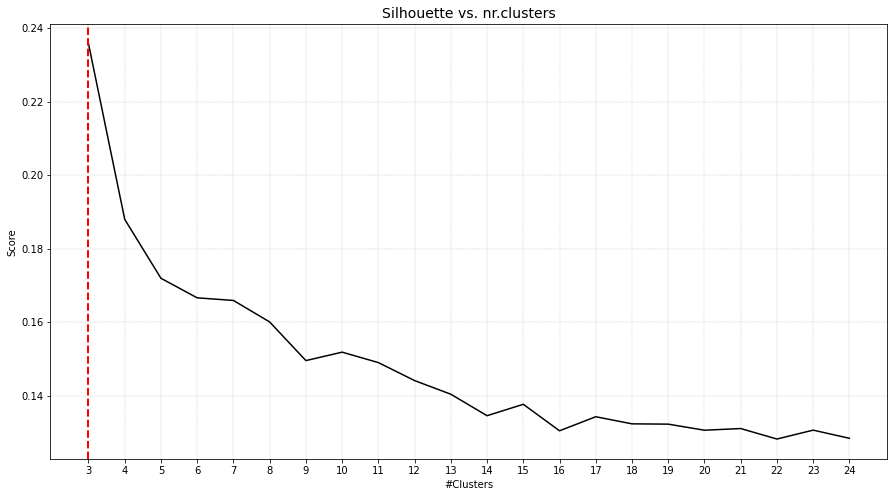

[clusteval] >Estimated number of n_clusters: 2, average silhouette_score=0.028


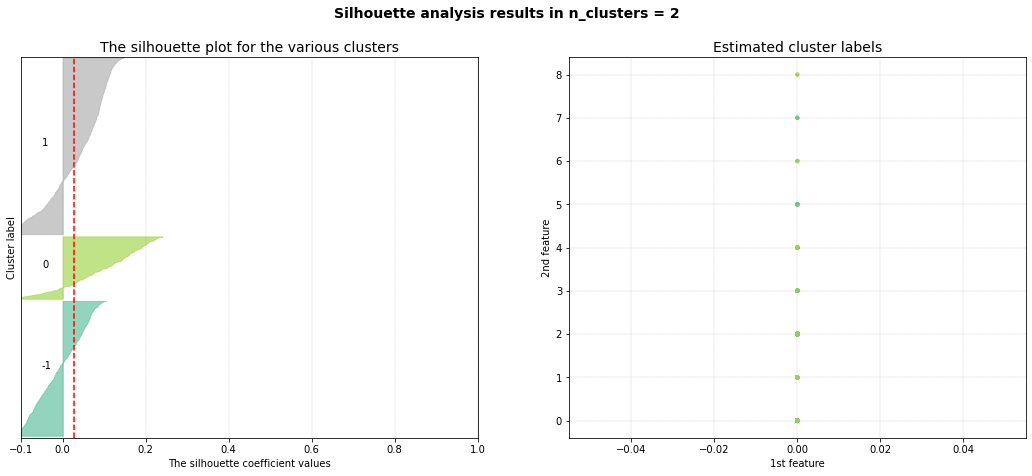

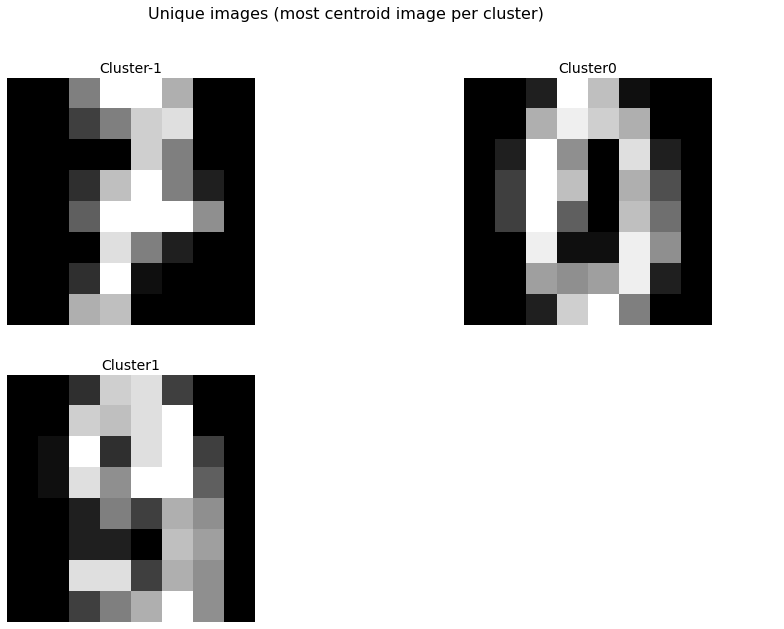

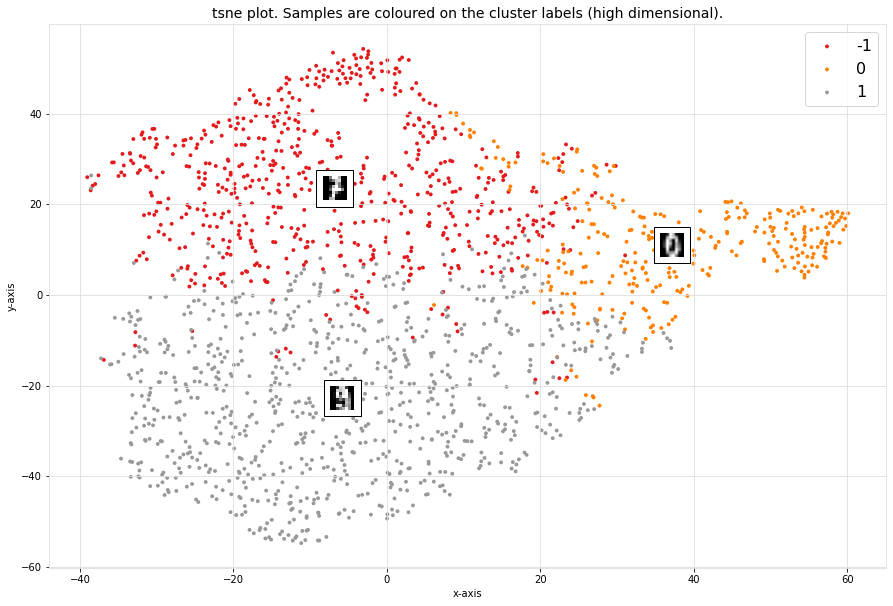

<Figure size 432x288 with 0 Axes>

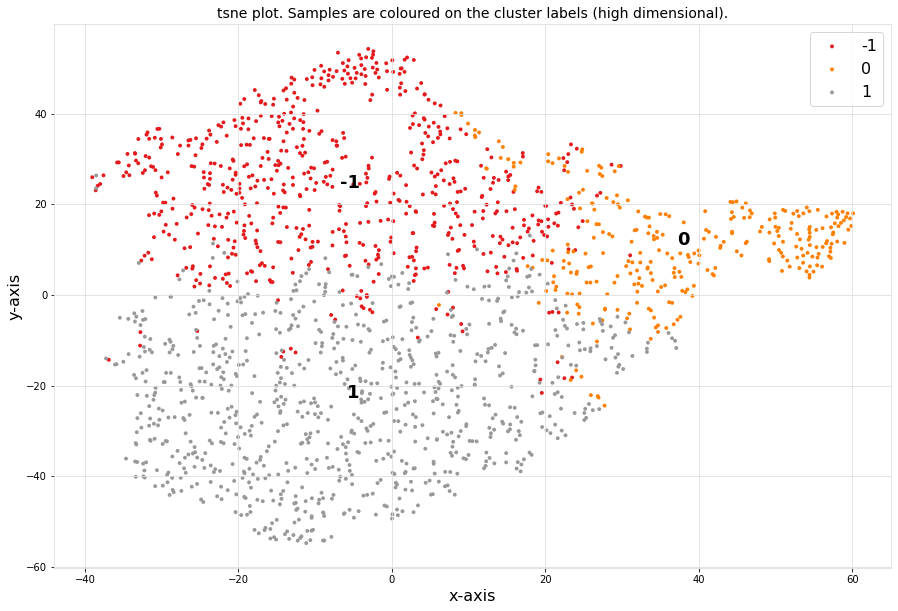

<Figure size 432x288 with 0 Axes>

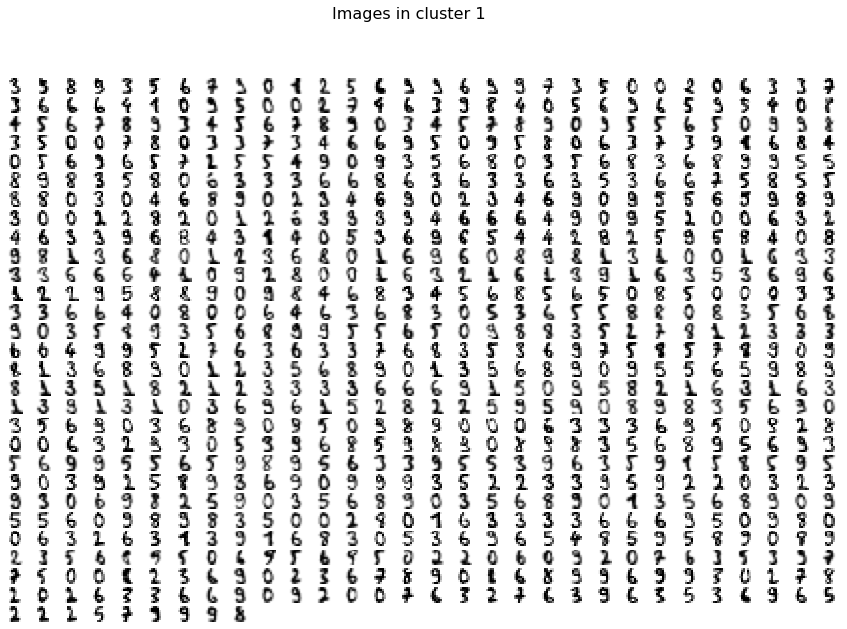

In [35]:
# Silhouette plots
cl.clusteval.plot()
cl.clusteval.scatter(X)


# Plot unique image per cluster
cl.plot_unique(img_mean=False)

# Scatterplot
cl.scatter(zoom=3, img_mean=False)
cl.scatter(zoom=None, img_mean=False)

# Plot images per cluster or all clusters
cl.plot(cmap='binary', labels=[1,2])



In [28]:
# init with PCA method
cl = Clustimage(method='hog',
                embedding='tsne',
                grayscale=False,
                dim=(128,128),
                params_pca={'n_components':0.95},
                store_to_disk=True,
                verbose=50)

In [29]:
# Load MNIST example data
X = cl.import_example(data='mnist')
#X = cl.import_data(train_data)

# There are 1797 digits in total, each with 64 features which is the flattened 8x8 grayscale image.
print(X.shape)
# (1797, 64)

# print(X)
# array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
#        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
#        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
#        ...,
#        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
#        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
#        [ 0.,  0., 10., ..., 12.,  1.,  0.]])

# Preprocessing, feature extraction, embedding and cluster evaluation
results = cl.fit_transform(X,
                           cluster='kmeans',
                           evaluate='silhouette',
                           metric='euclidean',
                           linkage='ward',
                           min_clust=3,
                           max_clust=25,
                           cluster_space='high')

(1797, 64)

[clusteval] >Fit using kmeans with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 22/22 [00:18<00:00,  1.18it/s]

[clusteval] >Optimal number clusters detected: [3].
[clusteval] >Fin.


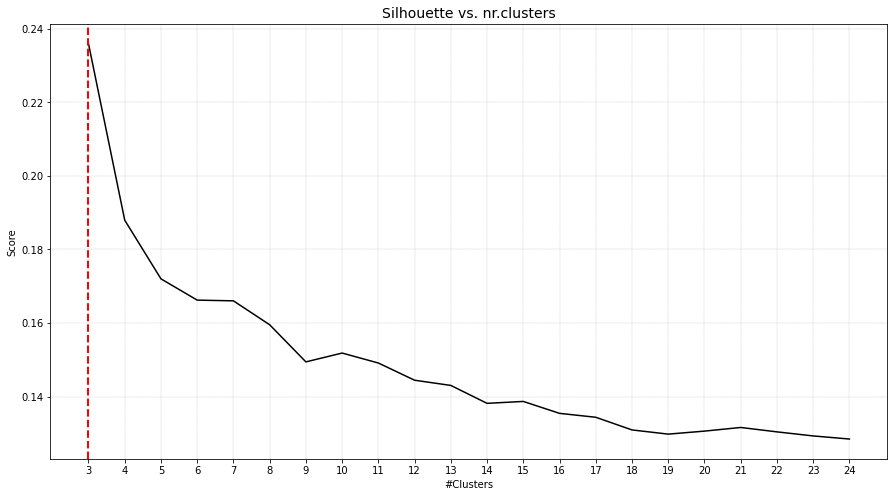

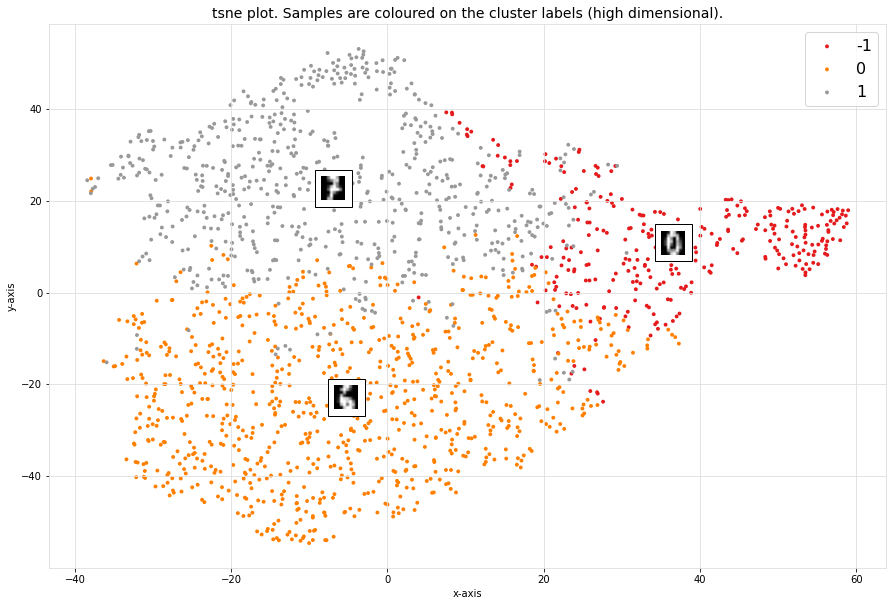

TypeError: ignored

<Figure size 432x288 with 0 Axes>

In [32]:
# Plot
cl.clusteval.plot()
cl.scatter(zoom=3, img_mean=False)

cl.extract_hog()
# Plot unique image per cluster
cl.plot_unique(img_mean=False)

# Plot images per cluster or all clusters
cl.plot(cmap='binary', labels=[1,2])

# Dendrogram
cl.dendrogram()

[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Scaling images..
[clustimage] >INFO> Writing images to tempdir [/tmp/clustimage]
100%|██████████| 1797/1797 [00:00<00:00, 2014.02it/s]
[clustimage] >INFO> Extracting features using method: [pca]
[clustimage] >INFO> Extracted features using [pca]: samples=1797, features=29
[clustimage] >INFO> Compute [tsne] embedding


[pca] >Column labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [64] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [29] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [64] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.


[clustimage] >INFO> Cluster evaluation using the [low] feature space of the [tsne] coordinates.



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 22/22 [00:01<00:00, 12.55it/s]
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (1797, 2) feature-space.


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [11].
[clusteval] >Fin.


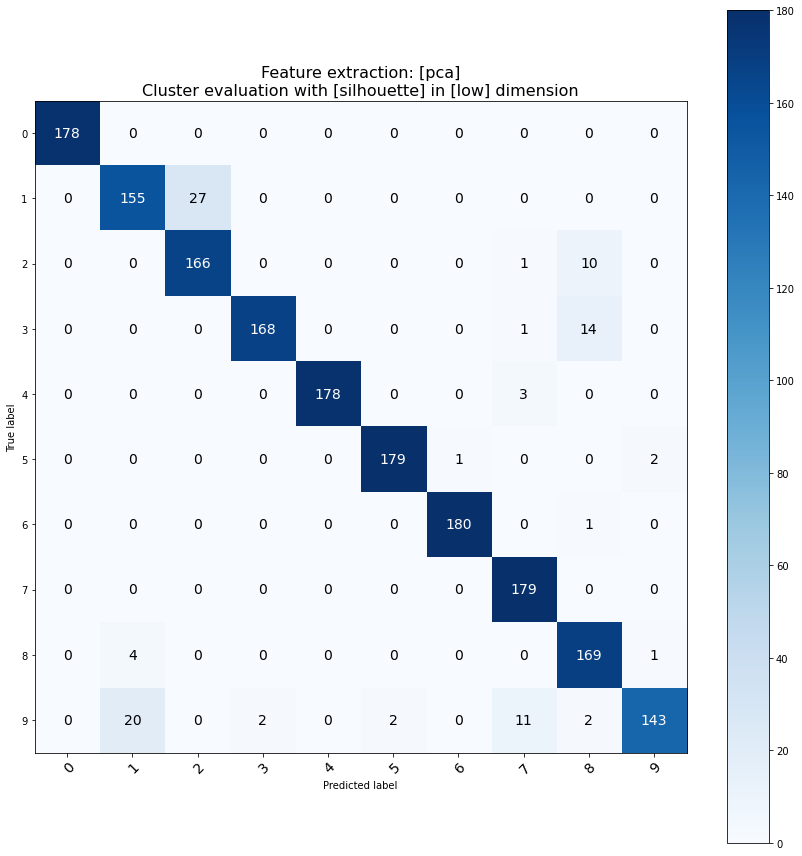

[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Scaling images..
[clustimage] >INFO> Writing images to tempdir [/tmp/clustimage]
100%|██████████| 1797/1797 [00:00<00:00, 8175.84it/s]
[clustimage] >INFO> Extracting features using method: [pca]
[clustimage] >INFO> Extracted features using [pca]: samples=1797, features=29
[clustimage] >INFO> Compute [tsne] embedding


[pca] >Column labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [64] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [29] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [64] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.


[clustimage] >INFO> Cluster evaluation using the [high] feature space of the [pca] features.



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 22/22 [00:01<00:00, 12.41it/s]
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (1797, 29) feature-space.


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [14].
[clusteval] >Fin.


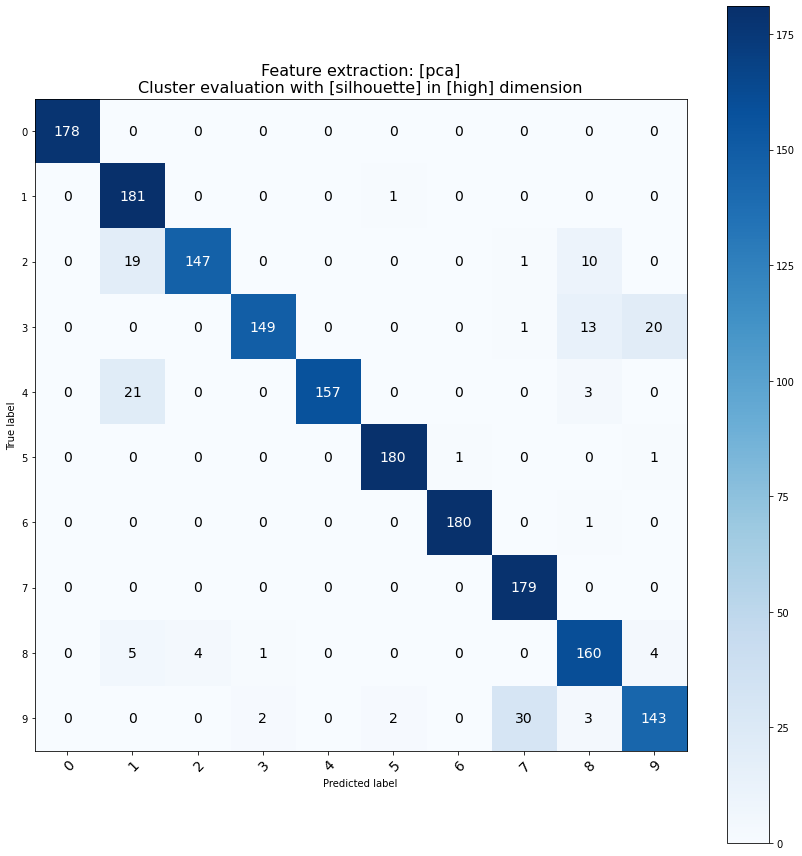

[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Scaling images..
[clustimage] >INFO> Writing images to tempdir [/tmp/clustimage]
100%|██████████| 1797/1797 [00:00<00:00, 7595.65it/s]
[clustimage] >INFO> Extracting features using method: [pca]
[clustimage] >INFO> Extracted features using [pca]: samples=1797, features=29
[clustimage] >INFO> Compute [tsne] embedding


[pca] >Column labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [64] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [29] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [64] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.


[clustimage] >INFO> Cluster evaluation using the [low] feature space of the [tsne] coordinates.



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using dbindex.


100%|██████████| 22/22 [00:00<00:00, 43.89it/s]
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (1797, 2) feature-space.


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [24].
[clusteval] >Fin.


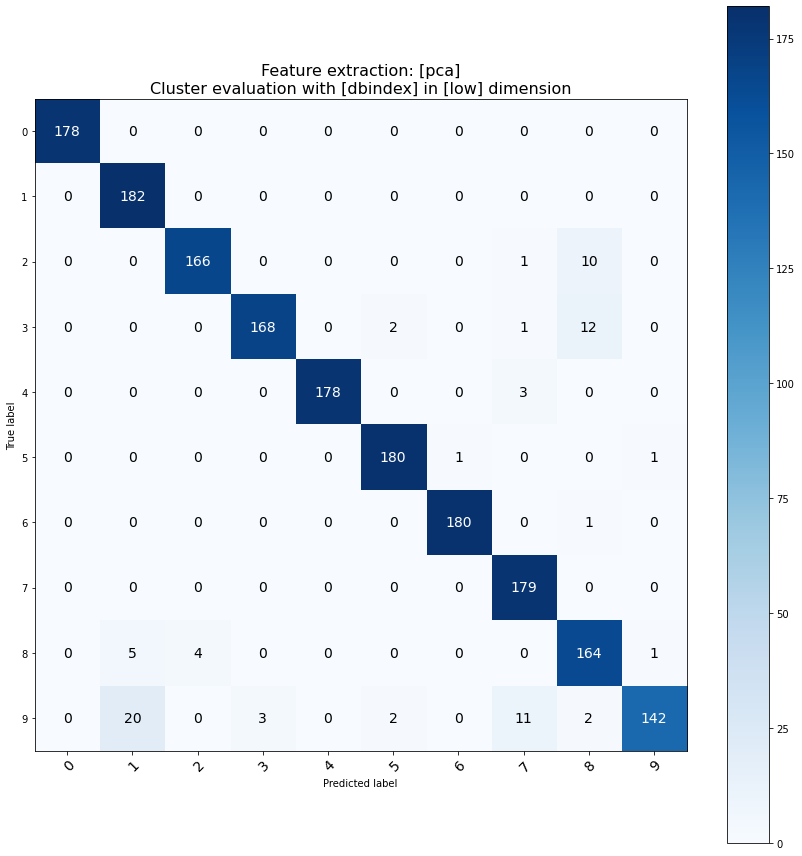

[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Scaling images..
[clustimage] >INFO> Writing images to tempdir [/tmp/clustimage]
100%|██████████| 1797/1797 [00:00<00:00, 8367.09it/s]
[clustimage] >INFO> Extracting features using method: [pca]
[clustimage] >INFO> Extracted features using [pca]: samples=1797, features=29
[clustimage] >INFO> Compute [tsne] embedding


[pca] >Column labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [64] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [29] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [64] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.


[clustimage] >INFO> Cluster evaluation using the [high] feature space of the [pca] features.



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using dbindex.


100%|██████████| 22/22 [00:00<00:00, 43.22it/s]
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (1797, 29) feature-space.


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [23].
[clusteval] >Fin.


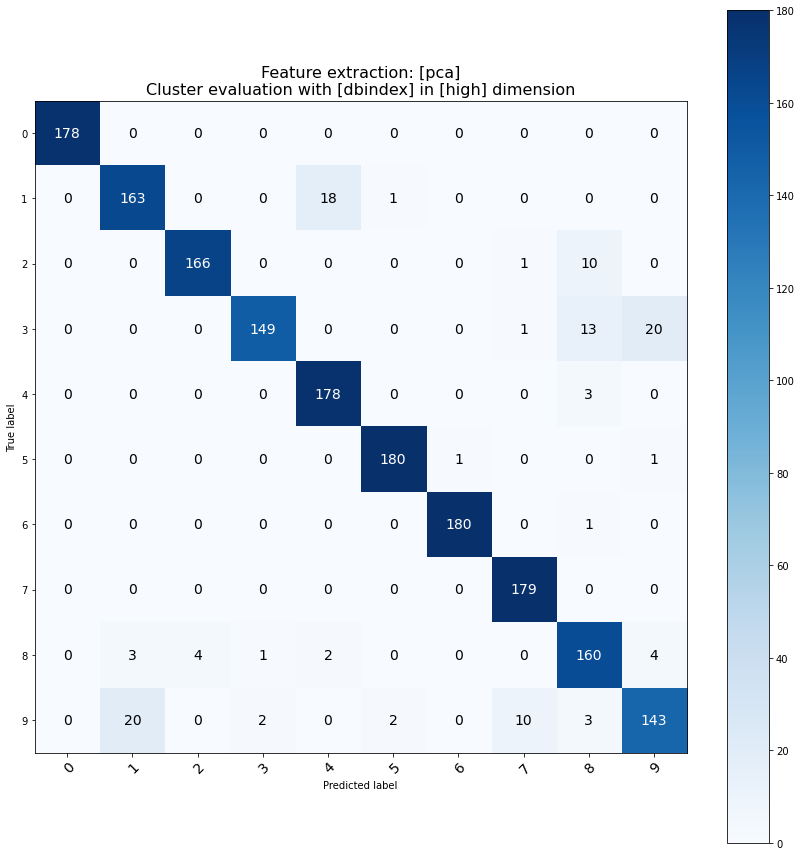

[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Scaling images..
[clustimage] >INFO> Writing images to tempdir [/tmp/clustimage]
100%|██████████| 1797/1797 [00:00<00:00, 9017.79it/s]
[clustimage] >INFO> Extracting features using method: [pca]
[clustimage] >INFO> Extracted features using [pca]: samples=1797, features=29
[clustimage] >INFO> Compute [tsne] embedding


[pca] >Column labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [64] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [29] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [64] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.


[clustimage] >INFO> Cluster evaluation using the [low] feature space of the [tsne] coordinates.
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (1797, 2) feature-space.



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using derivatives.
[clusteval] >Determining optimal clustering by derivatives..
[clusteval] >Clusters: 8
[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [8].
[clusteval] >Fin.


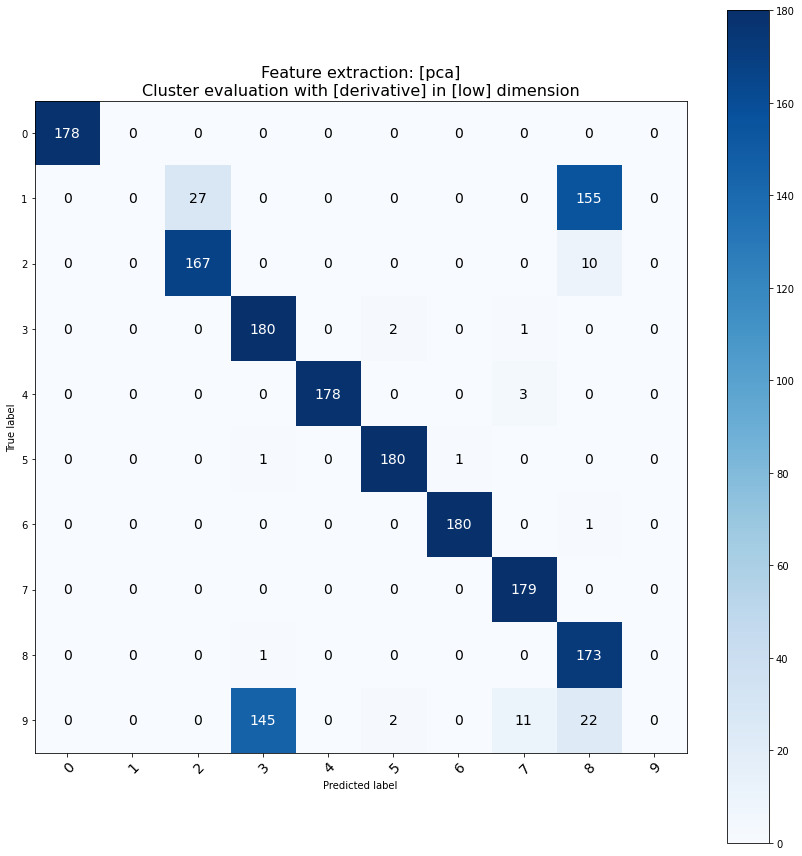

[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Scaling images..
[clustimage] >INFO> Writing images to tempdir [/tmp/clustimage]
100%|██████████| 1797/1797 [00:00<00:00, 8052.53it/s]
[clustimage] >INFO> Extracting features using method: [pca]
[clustimage] >INFO> Extracted features using [pca]: samples=1797, features=29
[clustimage] >INFO> Compute [tsne] embedding


[pca] >Column labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [64] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [29] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [64] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.


[clustimage] >INFO> Cluster evaluation using the [high] feature space of the [pca] features.
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (1797, 29) feature-space.



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using derivatives.
[clusteval] >Determining optimal clustering by derivatives..
[clusteval] >Clusters: 6
[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [5].
[clusteval] >Fin.


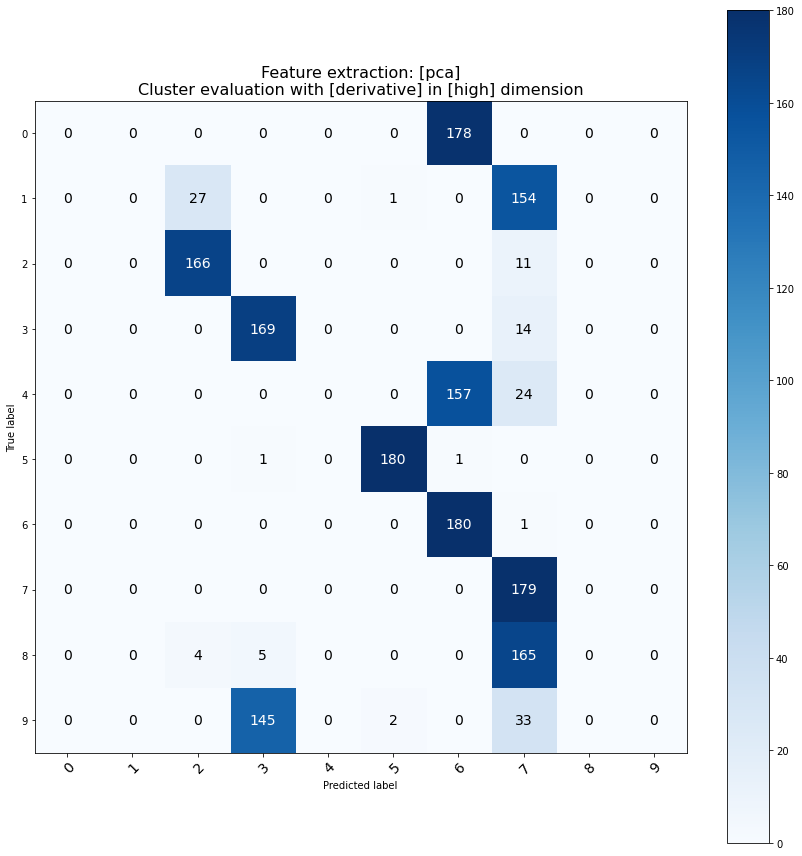

[clustimage] >WARNING> Parameter grayscale is set to True coz you are using method="hog"
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Scaling images..
[clustimage] >INFO> Writing images to tempdir [/tmp/clustimage]
100%|██████████| 1797/1797 [00:00<00:00, 7822.26it/s]
[clustimage] >INFO> Extracting features using method: [hog]
100%|██████████| 1797/1797 [00:00<00:00, 3555.16it/s]
[clustimage] >INFO> Extracted features using [hog]: samples=1797, features=64
[clustimage] >INFO> Compute [tsne] embedding
[clustimage] >INFO> Cluster evaluation using the [low] feature space of the [tsne] coordinates.



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 22/22 [00:01<00:00, 13.27it/s]
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (1797, 2) feature-space.


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [3].
[clusteval] >Fin.


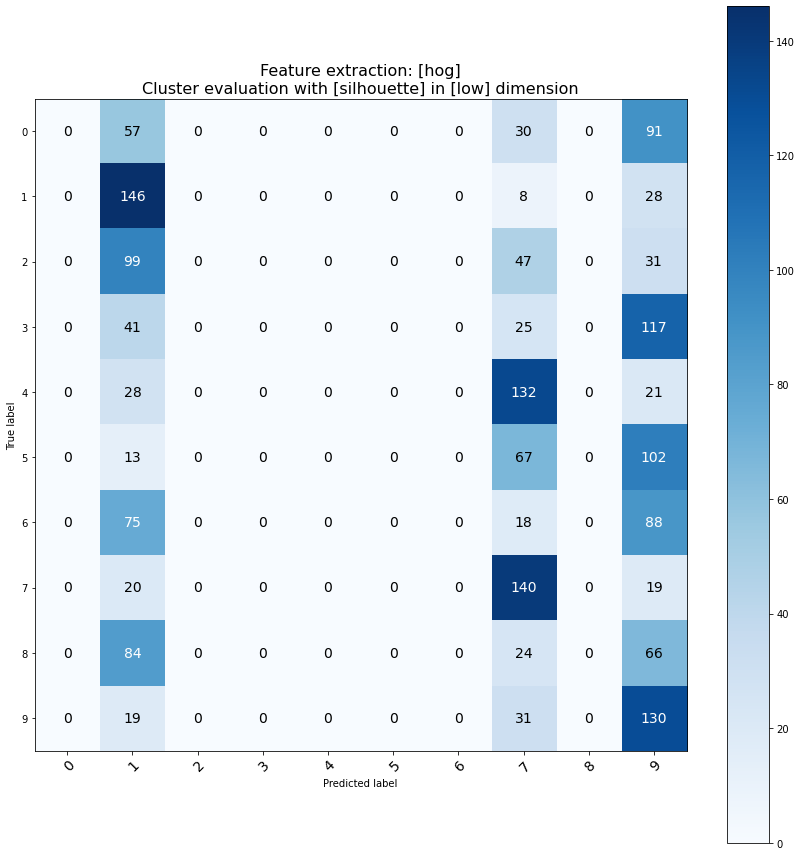

[clustimage] >WARNING> Parameter grayscale is set to True coz you are using method="hog"
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Scaling images..
[clustimage] >INFO> Writing images to tempdir [/tmp/clustimage]
100%|██████████| 1797/1797 [00:00<00:00, 5393.69it/s]
[clustimage] >INFO> Extracting features using method: [hog]
100%|██████████| 1797/1797 [00:00<00:00, 2144.71it/s]
[clustimage] >INFO> Extracted features using [hog]: samples=1797, features=64
[clustimage] >INFO> Compute [tsne] embedding
[clustimage] >INFO> Cluster evaluation using the [high] feature space of the [hog] features.



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 22/22 [00:01<00:00, 11.14it/s]
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (1797, 64) feature-space.


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [3].
[clusteval] >Fin.


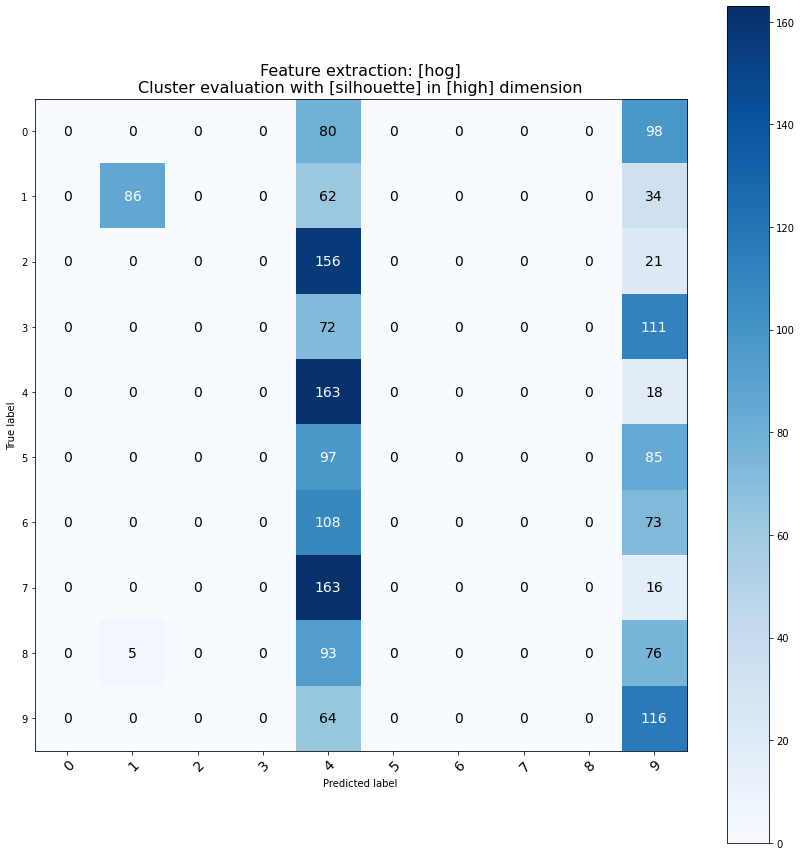

[clustimage] >WARNING> Parameter grayscale is set to True coz you are using method="hog"
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Scaling images..
[clustimage] >INFO> Writing images to tempdir [/tmp/clustimage]
100%|██████████| 1797/1797 [00:00<00:00, 7400.11it/s]
[clustimage] >INFO> Extracting features using method: [hog]
100%|██████████| 1797/1797 [00:00<00:00, 3336.88it/s]
[clustimage] >INFO> Extracted features using [hog]: samples=1797, features=64
[clustimage] >INFO> Compute [tsne] embedding
[clustimage] >INFO> Cluster evaluation using the [low] feature space of the [tsne] coordinates.



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using dbindex.


100%|██████████| 22/22 [00:00<00:00, 43.05it/s]
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (1797, 2) feature-space.


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [24].
[clusteval] >Fin.


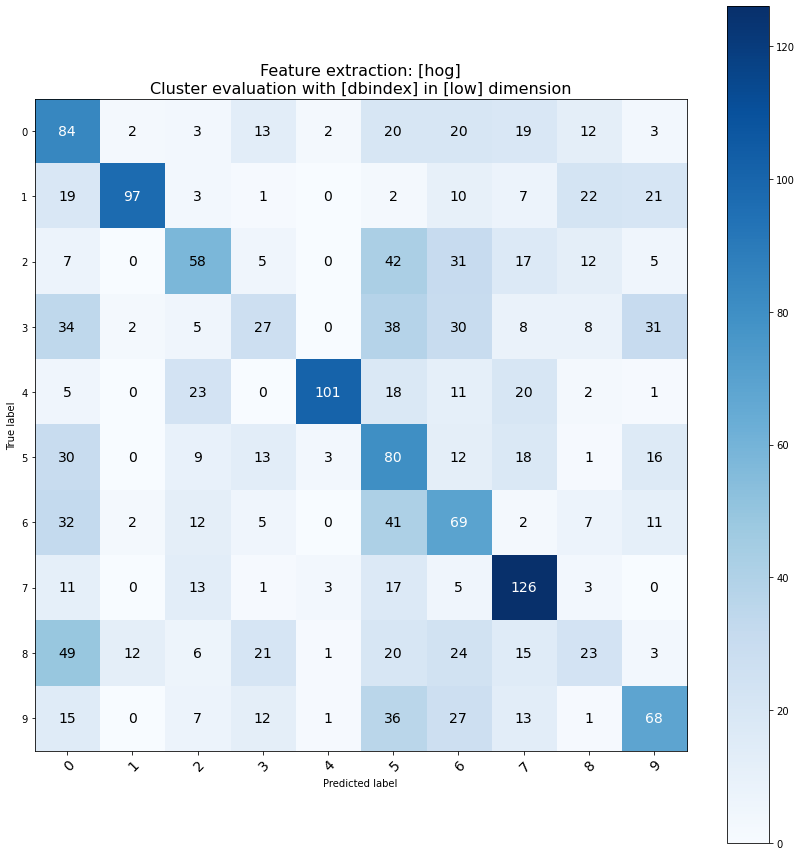

[clustimage] >WARNING> Parameter grayscale is set to True coz you are using method="hog"
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Scaling images..
[clustimage] >INFO> Writing images to tempdir [/tmp/clustimage]
100%|██████████| 1797/1797 [00:00<00:00, 7559.64it/s]
[clustimage] >INFO> Extracting features using method: [hog]
100%|██████████| 1797/1797 [00:00<00:00, 3389.59it/s]
[clustimage] >INFO> Extracted features using [hog]: samples=1797, features=64
[clustimage] >INFO> Compute [tsne] embedding
[clustimage] >INFO> Cluster evaluation using the [high] feature space of the [hog] features.



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using dbindex.


100%|██████████| 22/22 [00:00<00:00, 42.01it/s]
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (1797, 64) feature-space.


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [24].
[clusteval] >Fin.


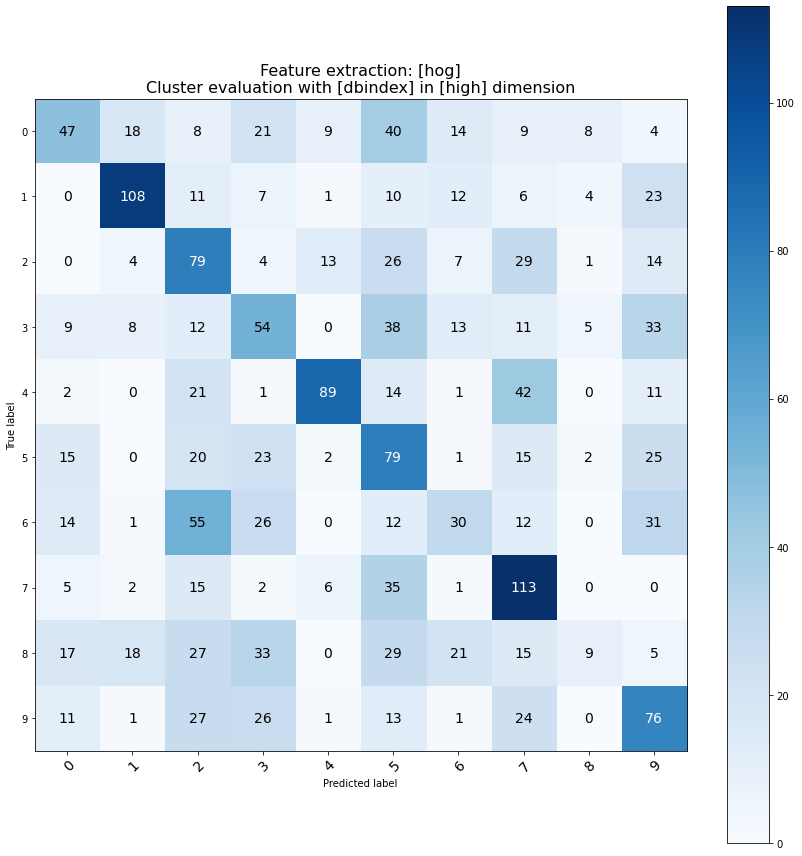

[clustimage] >WARNING> Parameter grayscale is set to True coz you are using method="hog"
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Scaling images..
[clustimage] >INFO> Writing images to tempdir [/tmp/clustimage]
100%|██████████| 1797/1797 [00:00<00:00, 7631.77it/s]
[clustimage] >INFO> Extracting features using method: [hog]
100%|██████████| 1797/1797 [00:00<00:00, 3407.67it/s]
[clustimage] >INFO> Extracted features using [hog]: samples=1797, features=64
[clustimage] >INFO> Compute [tsne] embedding
[clustimage] >INFO> Cluster evaluation using the [low] feature space of the [tsne] coordinates.
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (1797, 2) feature-space.



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using derivatives.
[clusteval] >Determining optimal clustering by derivatives..
[clusteval] >Clusters: 8
[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [8].
[clusteval] >Fin.


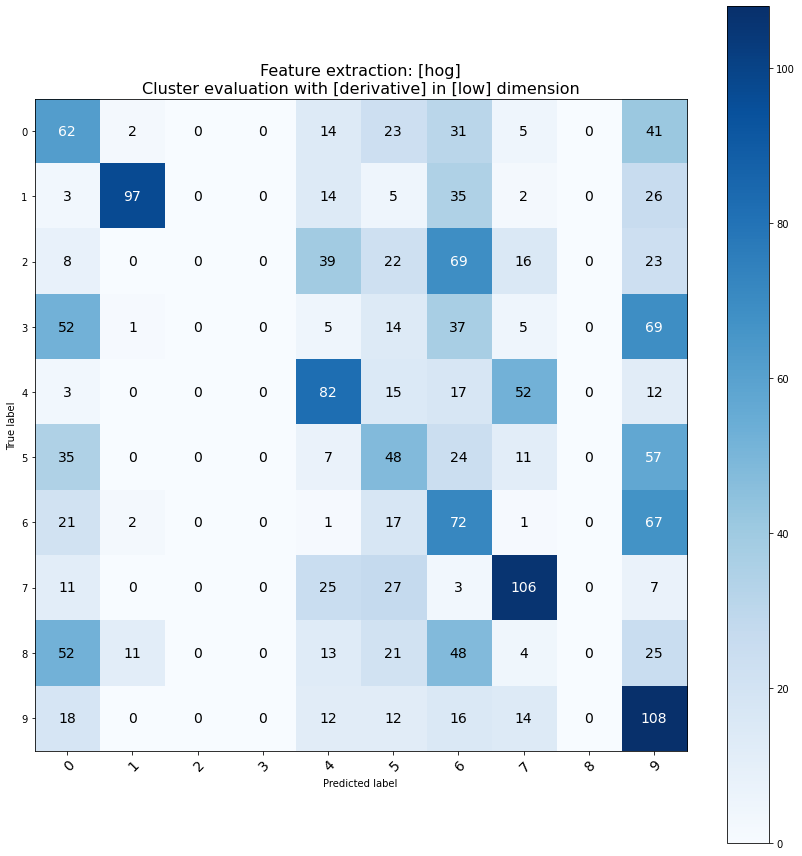

[clustimage] >WARNING> Parameter grayscale is set to True coz you are using method="hog"
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Scaling images..
[clustimage] >INFO> Writing images to tempdir [/tmp/clustimage]
100%|██████████| 1797/1797 [00:00<00:00, 7450.35it/s]
[clustimage] >INFO> Extracting features using method: [hog]
100%|██████████| 1797/1797 [00:00<00:00, 3394.70it/s]
[clustimage] >INFO> Extracted features using [hog]: samples=1797, features=64
[clustimage] >INFO> Compute [tsne] embedding
[clustimage] >INFO> Cluster evaluation using the [high] feature space of the [hog] features.
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (1797, 64) feature-space.



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using derivatives.
[clusteval] >Determining optimal clustering by derivatives..
[clusteval] >Clusters: 7
[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [7].
[clusteval] >Fin.


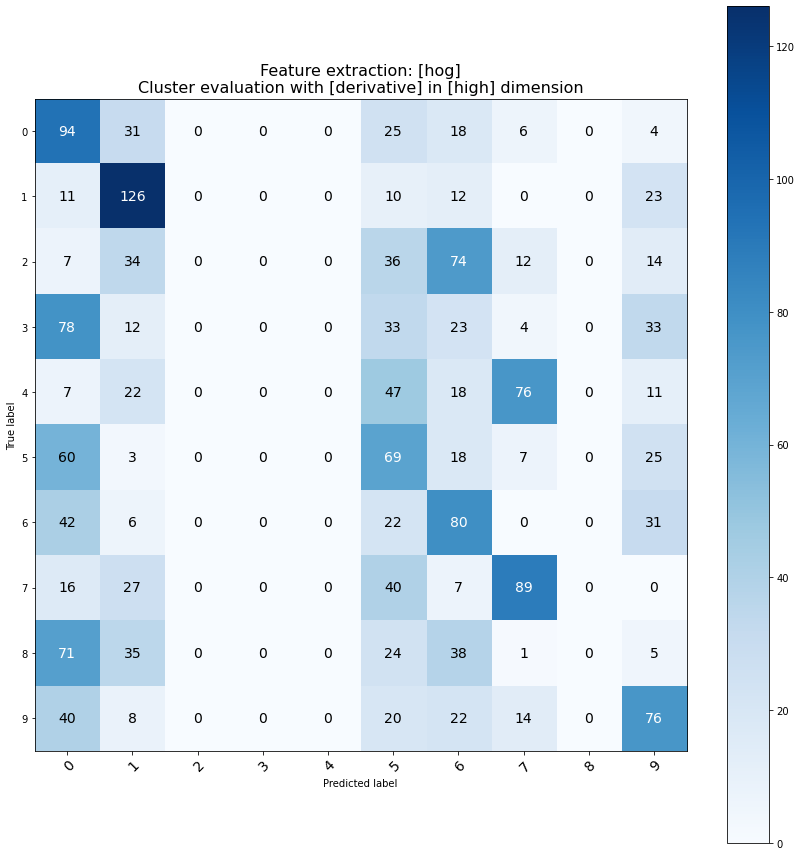

[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Scaling images..
[clustimage] >INFO> Writing images to tempdir [/tmp/clustimage]
100%|██████████| 1797/1797 [00:00<00:00, 7396.87it/s]
[clustimage] >INFO> Extracting features using method: [None]
[clustimage] >INFO> Extracted features using [None]: samples=1797, features=64
[clustimage] >INFO> Compute [tsne] embedding
[clustimage] >INFO> Cluster evaluation using the [low] feature space of the [tsne] coordinates.



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 22/22 [00:01<00:00, 12.49it/s]
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (1797, 2) feature-space.


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [10].
[clusteval] >Fin.


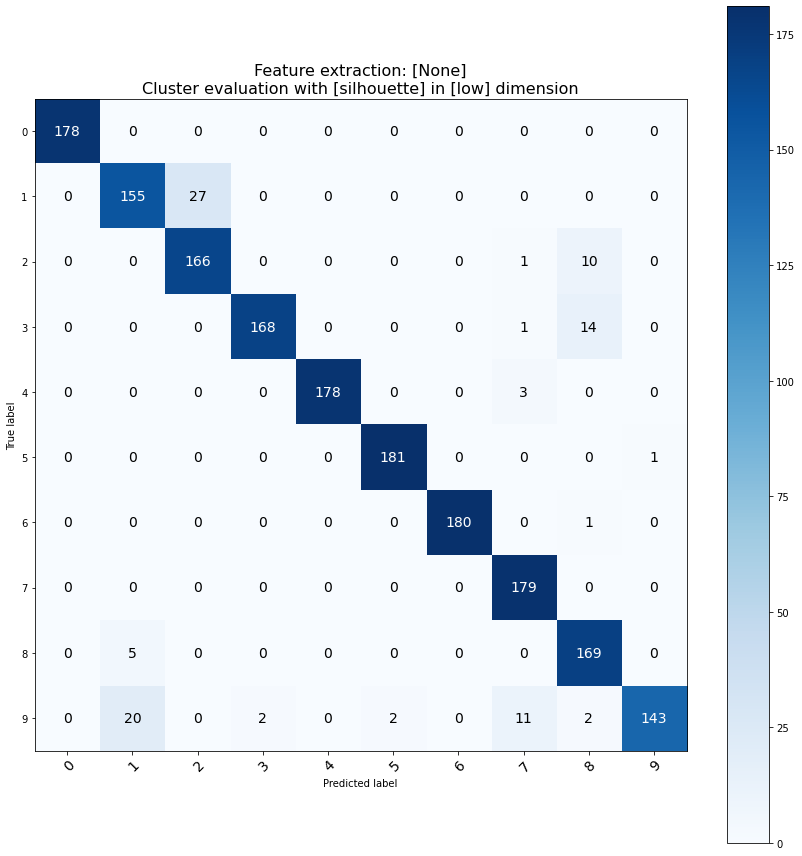

[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Scaling images..
[clustimage] >INFO> Writing images to tempdir [/tmp/clustimage]
100%|██████████| 1797/1797 [00:00<00:00, 7771.66it/s]
[clustimage] >INFO> Extracting features using method: [None]
[clustimage] >INFO> Extracted features using [None]: samples=1797, features=64
[clustimage] >INFO> Compute [tsne] embedding
[clustimage] >INFO> Cluster evaluation using the [high] feature space of the [None] features.



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 22/22 [00:01<00:00, 11.17it/s]
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (1797, 64) feature-space.


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [16].
[clusteval] >Fin.


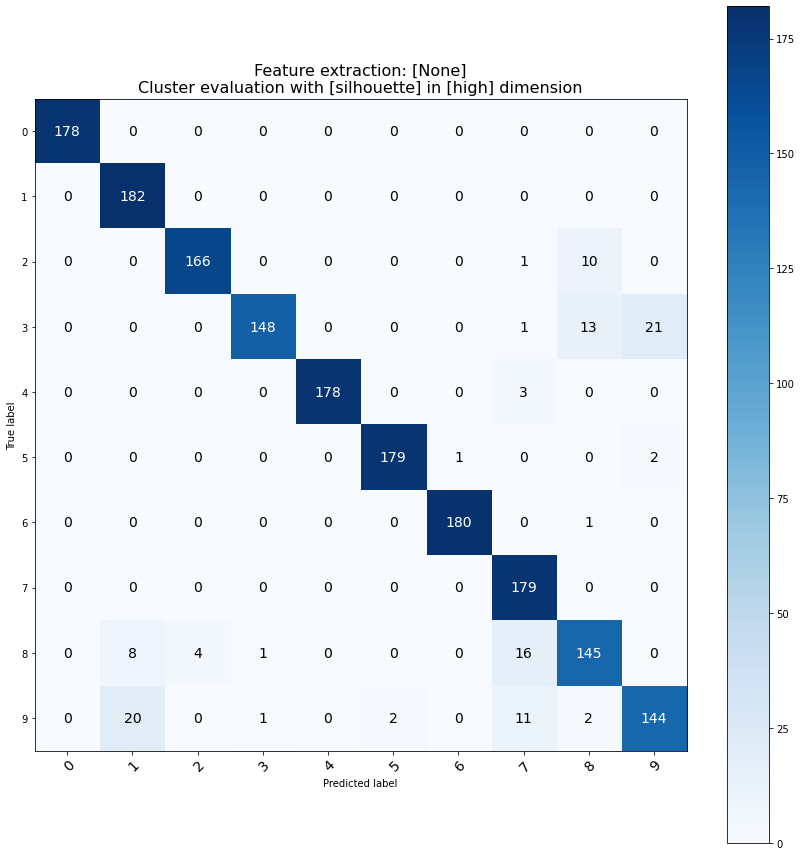

[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Scaling images..
[clustimage] >INFO> Writing images to tempdir [/tmp/clustimage]
100%|██████████| 1797/1797 [00:00<00:00, 7790.06it/s]
[clustimage] >INFO> Extracting features using method: [None]
[clustimage] >INFO> Extracted features using [None]: samples=1797, features=64
[clustimage] >INFO> Compute [tsne] embedding
[clustimage] >INFO> Cluster evaluation using the [low] feature space of the [tsne] coordinates.



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using dbindex.


100%|██████████| 22/22 [00:00<00:00, 43.69it/s]
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (1797, 2) feature-space.


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [24].
[clusteval] >Fin.


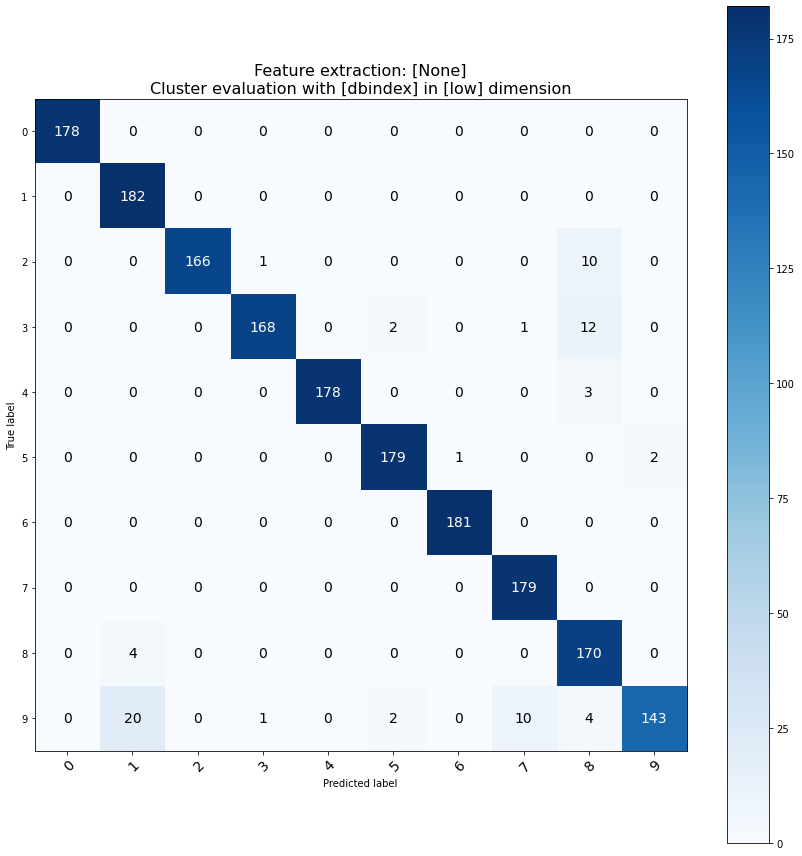

[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Scaling images..
[clustimage] >INFO> Writing images to tempdir [/tmp/clustimage]
100%|██████████| 1797/1797 [00:00<00:00, 7049.78it/s]
[clustimage] >INFO> Extracting features using method: [None]
[clustimage] >INFO> Extracted features using [None]: samples=1797, features=64
[clustimage] >INFO> Compute [tsne] embedding
[clustimage] >INFO> Cluster evaluation using the [high] feature space of the [None] features.



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using dbindex.


100%|██████████| 22/22 [00:00<00:00, 35.68it/s]
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (1797, 64) feature-space.


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [23].
[clusteval] >Fin.


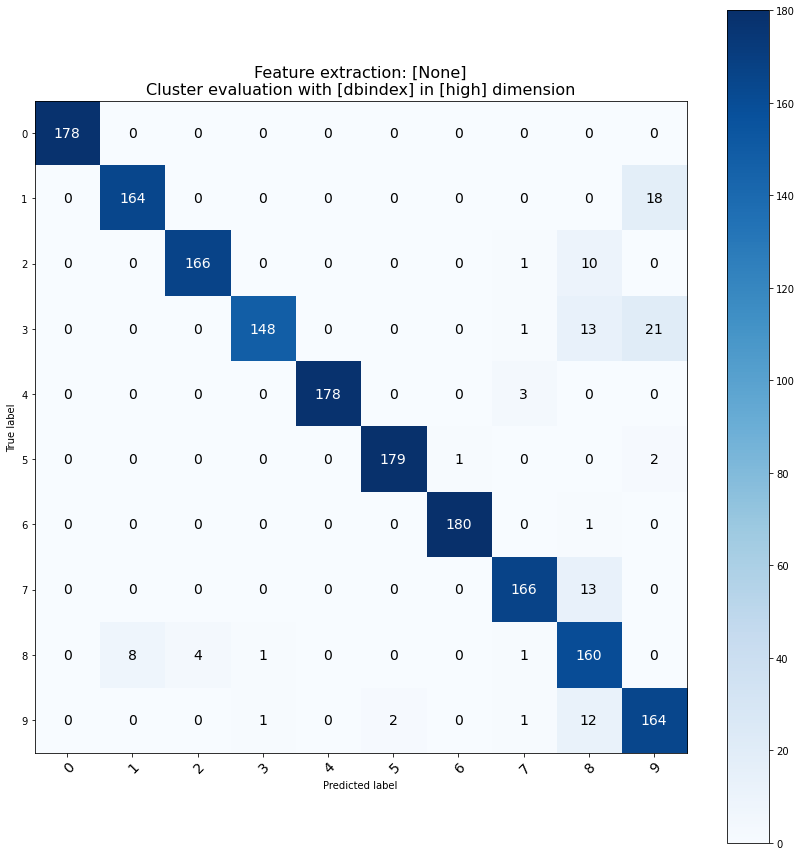

[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Scaling images..
[clustimage] >INFO> Writing images to tempdir [/tmp/clustimage]
100%|██████████| 1797/1797 [00:00<00:00, 6822.08it/s]
[clustimage] >INFO> Extracting features using method: [None]
[clustimage] >INFO> Extracted features using [None]: samples=1797, features=64
[clustimage] >INFO> Compute [tsne] embedding
[clustimage] >INFO> Cluster evaluation using the [low] feature space of the [tsne] coordinates.
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (1797, 2) feature-space.



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using derivatives.
[clusteval] >Determining optimal clustering by derivatives..
[clusteval] >Clusters: 5
[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [5].
[clusteval] >Fin.


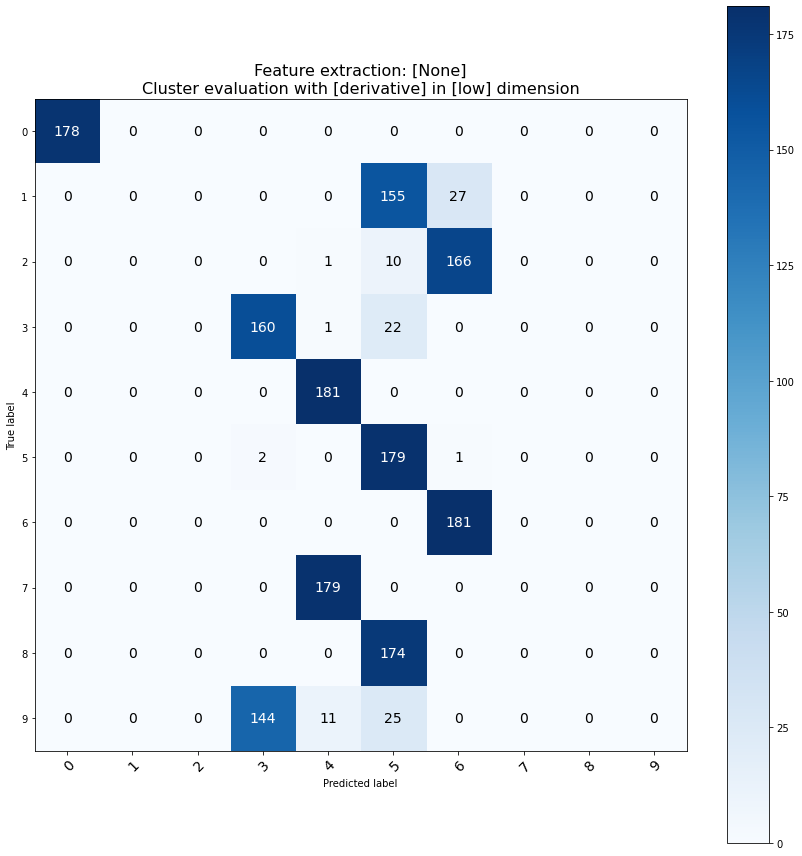

[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Scaling images..
[clustimage] >INFO> Writing images to tempdir [/tmp/clustimage]
100%|██████████| 1797/1797 [00:00<00:00, 6120.65it/s]
[clustimage] >INFO> Extracting features using method: [None]
[clustimage] >INFO> Extracted features using [None]: samples=1797, features=64
[clustimage] >INFO> Compute [tsne] embedding
[clustimage] >INFO> Cluster evaluation using the [high] feature space of the [None] features.
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (1797, 64) feature-space.



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using derivatives.
[clusteval] >Determining optimal clustering by derivatives..
[clusteval] >Clusters: 9
[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [9].
[clusteval] >Fin.


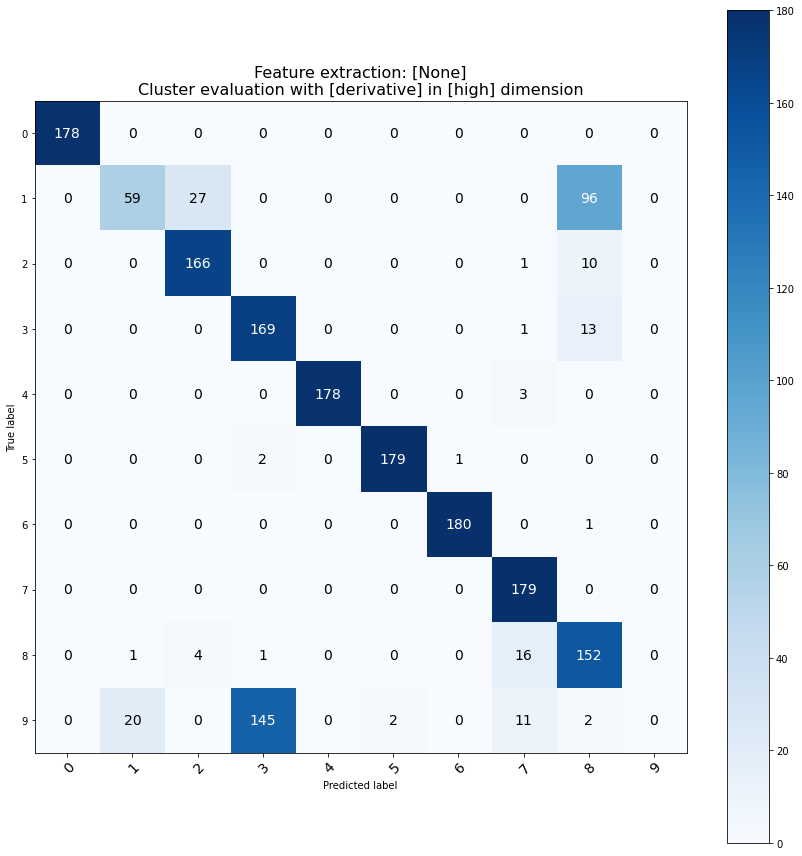

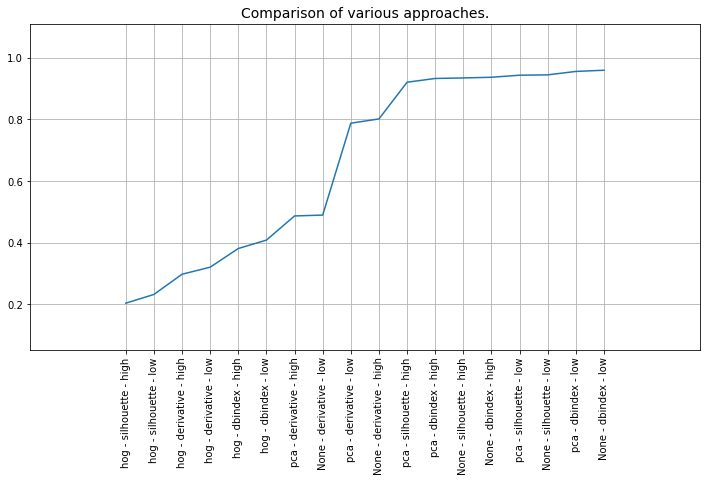

In [24]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from clustimage import Clustimage
import classeval as clf
import itertools as it
from sklearn.metrics import accuracy_score

# Load example data
digits = load_digits(n_class=10)
X, y_true = digits.data, digits.target

param_grid = {
    'method':['pca', 'hog', None],
    'evaluate' : ['silhouette', 'dbindex', 'derivative'],
    'cluster_space' : ['low', 'high'],
    }

scores = []
labels = []
allNames = param_grid.keys()
combinations = list(it.product(*(param_grid[Name] for Name in allNames)))

# Iterate over all combinations
for combination in combinations:
    # Initialize
    cl = Clustimage(method=combination[0])

    # Preprocessing, feature extraction and cluster evaluation
    results = cl.fit_transform(X, cluster_space=combination[2], evaluate=combination[1])

    # Compute confmat
    cm = clf.confmatrix.eval(y_true, results['labels'], normalize=False)

    # Transform numbers to make it comparible
    y_pred = results['labels']
    cm_argmax = cm['confmat'].argmax(axis=0)
    y_pred_ = np.array([cm_argmax[i] for i in y_pred])

    # Compute again confmat
    cm = clf.confmatrix.eval(y_true, y_pred_, normalize=False)
    fig,ax = clf.confmatrix.plot(cm)
    ax.set_title('Feature extraction: [%s]\nCluster evaluation with [%s] in [%s] dimension' %(combination[0], combination[1], combination[2]), fontsize=16)
    plt.pause(0.1)

    # Store scores and labels
    scores.append(accuracy_score(y_true,y_pred_))
    labels.append(str(combination[0]) + ' - ' + combination[1] + ' - ' + combination[2])

# Make plot
import numpy as np
scores=np.array(scores)
labels=np.array(labels)
isort=np.argsort(scores)
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,len(scores)), scores[isort])
plt.xticks(np.arange(0,len(scores)), labels[isort], rotation='vertical')
plt.margins(0.2)
plt.title("Comparison of various approaches.", fontsize=14)
plt.grid(True)

In [23]:
!pip install classeval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[clusteval] >Evaluate using dbindex.


100%|██████████| 23/23 [00:01<00:00, 16.60it/s]


[clusteval] >Evaluate using silhouette.


100%|██████████| 23/23 [00:03<00:00,  6.27it/s]


[clusteval] >Evaluate using derivatives.
[clusteval] >Determining optimal clustering by derivatives..
[clusteval] >Clusters: 9
[clusteval] >Gridsearch across epsilon..
[clusteval] >Evaluate using silhouette..


100%|██████████| 245/245 [00:42<00:00,  5.79it/s]


ValueError: ignored

<Figure size 432x288 with 0 Axes>

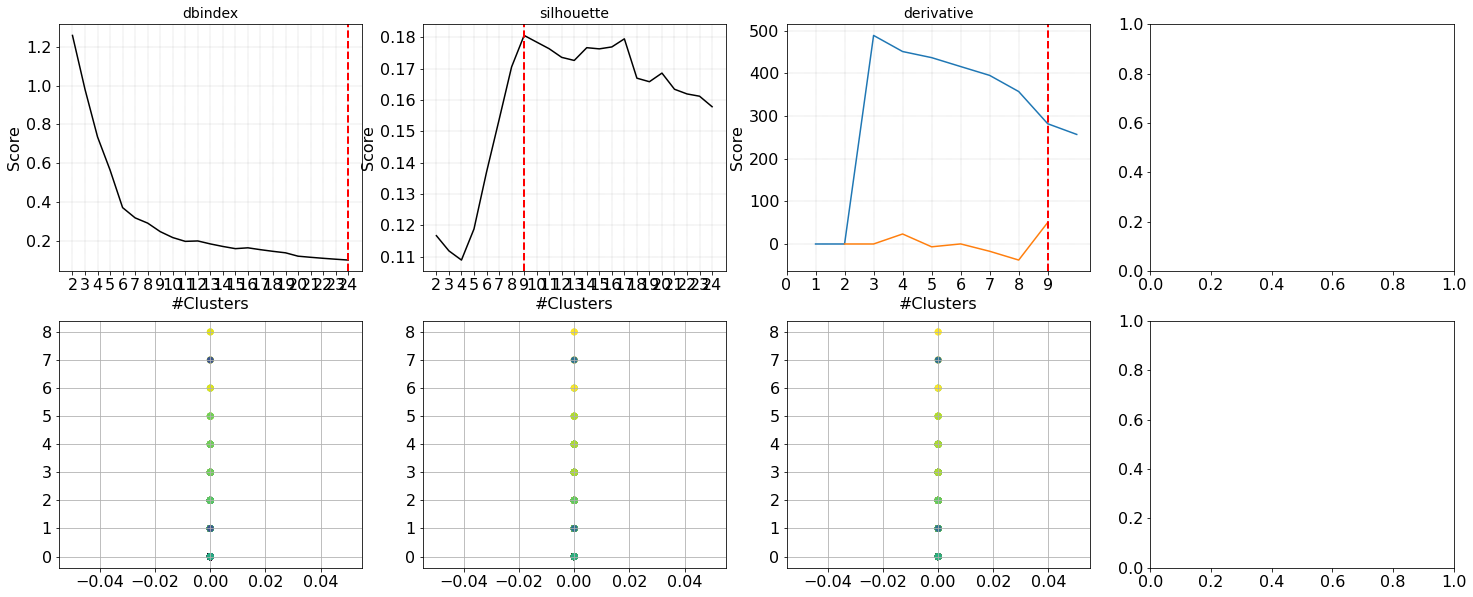

In [22]:
import matplotlib.pyplot as plt
import clusteval

plt.figure()
fig, axs = plt.subplots(2,4, figsize=(25,10))

# dbindex
results = clusteval.dbindex.fit(X)
_ = clusteval.dbindex.plot(results, title='dbindex', ax=axs[0][0], visible=False)
axs[1][0].scatter(X[:,0], X[:,1],c=results['labx']);axs[1][0].grid(True)

# silhouette
results = clusteval.silhouette.fit(X)
_ = clusteval.silhouette.plot(results, title='silhouette', ax=axs[0][1], visible=False)
axs[1][1].scatter(X[:,0], X[:,1],c=results['labx']);axs[1][1].grid(True)

# derivative
results = clusteval.derivative.fit(X)
_ = clusteval.derivative.plot(results, title='derivative', ax=axs[0][2], visible=False)
axs[1][2].scatter(X[:,0], X[:,1],c=results['labx']);axs[1][2].grid(True)

# dbscan
results = clusteval.dbscan.fit(X)
_ = clusteval.dbscan.plot(results, title='dbscan', ax=axs[0][3], visible=False)
axs[1][3].scatter(X[:,0], X[:,1],c=results['labx']);axs[1][3].grid(True)

plt.show()